## 6.1.1 Financial data

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

prices = yf.download(tickers=["VOW3.DE", "TSLA"],   #Volkswagen
                      start="2011-01-01", 
                      end="2024-12-31")

prices.head().round(3)


[*********************100%***********************]  2 of 2 completed


Price       Close           High            Low           Open          \
Ticker       TSLA VOW3.DE   TSLA VOW3.DE   TSLA VOW3.DE   TSLA VOW3.DE   
Date                                                                     
2011-01-03  1.775  65.385  1.800  65.385  1.727  63.438  1.789  63.643   
2011-01-04  1.778  66.128  1.797  66.435  1.735  64.129  1.777  64.898   
2011-01-05  1.789  64.437  1.793  66.384  1.746  62.618  1.765  66.000   
2011-01-06  1.859  63.976  1.867  65.257  1.787  63.796  1.789  64.796   
2011-01-07  1.883  65.513  1.905  66.205  1.860  64.283  1.867  64.565   

Price           Volume             
Ticker            TSLA    VOW3.DE  
Date                               
2011-01-03  19245000.0   831706.0  
2011-01-04  17811000.0   991823.0  
2011-01-05  21700500.0  1314476.0  
2011-01-06  30918000.0   900440.0  
2011-01-07  33718500.0   895577.0

We draw two plots: the time series of adjusted closing prices and the histogram of the **financial returns** computed from the adjusted closing prices of VOW3.DE. 

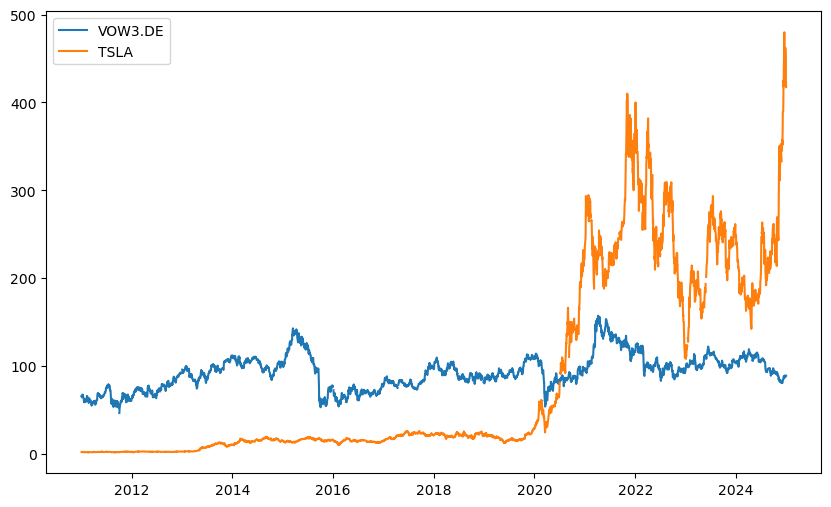

In [4]:
from matplotlib import pyplot as plt

# closig prices for both stocks
plt.figure(figsize=(10, 6))
for ticker in ["VOW3.DE", "TSLA"]:
    plt.plot(prices.index, prices["Close"][ticker], label=ticker)

plt.legend()
plt.show()

#### Computation of the daily returns of Volkswagen (VOW3.DE) and Tesla (TSLA)

By computing returns we measure the percentage change of asset prices over time. 
Returns measure percentage variations, enabling a more meaningful comparison between different stocks or assets. Moreover, returns more accurately reflect changes in the investment's value, resulting in more informative metrics for performance evaluation and risk management. Utilizing returns instead of prices offers a relative perspective that facilitates understanding market dynamics and supports more informed investment decisions. 

Formula:

$$ R_t = \frac{P_t-P_{t-1}}{P_{t-1}}, or$$

$$ R_t = \frac{P_t}{P_{t-1}}-1.$$

To further improve the statistics property of the returns (i.e., additivity over time and gaussianity), in Finance we often use the log-returns, $r_t$, which are defined as: 

$$ r_t = \log \left( \frac{P_t}{P_{t-1}} \right).$$

Returns and the log-returns:

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Extract the adjusted closing prices from the dataset
VOW3DE = prices["Close"]["VOW3.DE"]
TSLA = prices["Close"]["TSLA"]

# Calculation log-returns of VOW3.DE and TSLA
ret_vow3de = (VOW3DE / VOW3DE.shift(1) - 1).dropna() # drop the first observation
ret_tsla = (TSLA / TSLA.shift(1) - 1).dropna() # drop the first observation

l_ret_vow3de = np.log(VOW3DE / VOW3DE.shift(1)).dropna() # drop the first observation
l_ret_tsla = np.log(TSLA / TSLA.shift(1)).dropna() # drop the first observation

# Combining into a DataFrame and print the first lines
returns_df = pd.concat([ret_vow3de, l_ret_vow3de, ret_tsla, l_ret_tsla], 
                       axis=1, 
                       keys=['VOW3.DE Simple Returns', 'VOW3.DE Log Returns', 'TSLA Simple Returns', 'TSLA Log Returns'])

returns_df.dropna().head()


,VOW3.DE Simple Returns,VOW3.DE Log Returns,TSLA Simple Returns,TSLA Log Returns
Date,,,,
2011-01-04,0.011364,0.011300,0.001878,0.001876
2011-01-05,-0.025572,-0.025904,0.005999,0.005981
2011-01-06,-0.007157,-0.007183,0.039135,0.038389
2011-01-07,0.024029,0.023745,0.012912,0.012830
2011-01-10,-0.007822,-0.007852,0.007436,0.007409


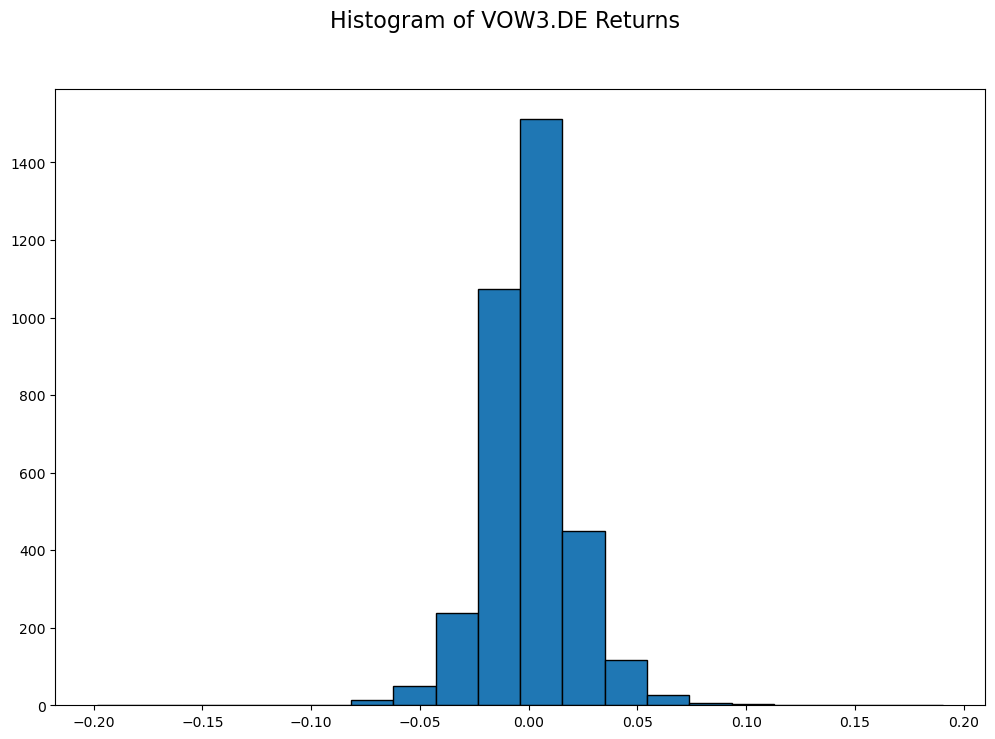

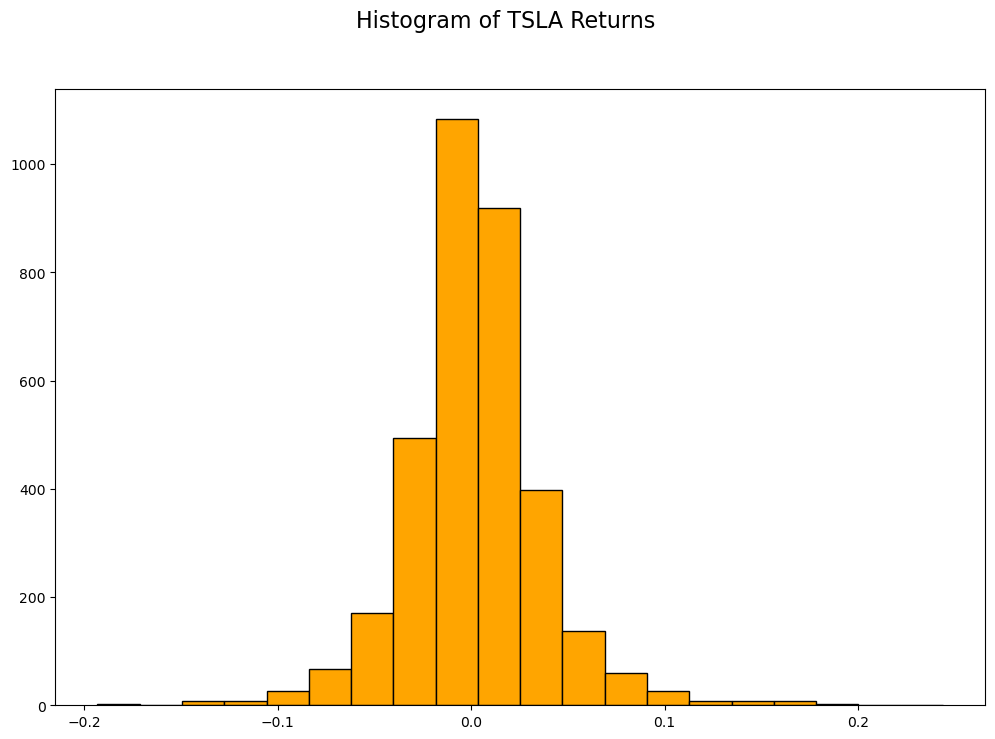

In [9]:
import matplotlib.pyplot as plt

# Assuming ret_vow3de and ret_tsla are calculated returns for VOW3.DE and TSLA
# VOW3.DE returns
plt.figure(figsize=(12, 8))
plt.hist(ret_vow3de, bins=20, edgecolor='black', label='VOW3.DE Returns')
plt.suptitle('Histogram of VOW3.DE Returns', fontsize=16)
plt.show()

# TSLA returns
plt.figure(figsize=(12, 8))
plt.hist(ret_tsla, bins=20, edgecolor='black', color='orange', label='TSLA Returns')
plt.suptitle('Histogram of TSLA Returns', fontsize=16)
plt.show()




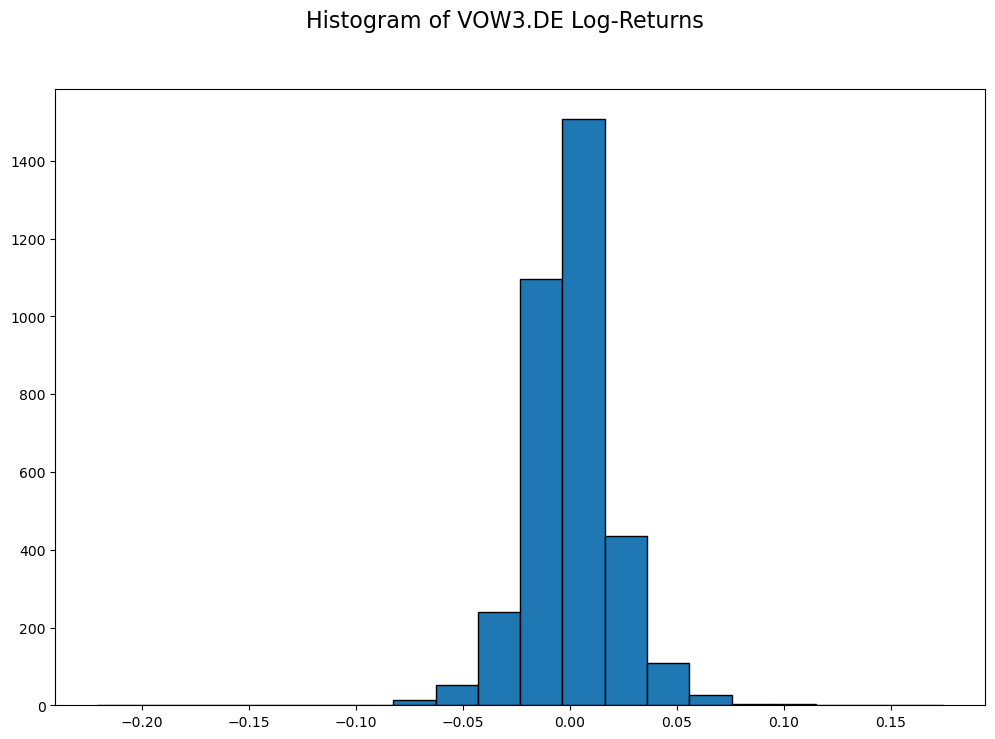

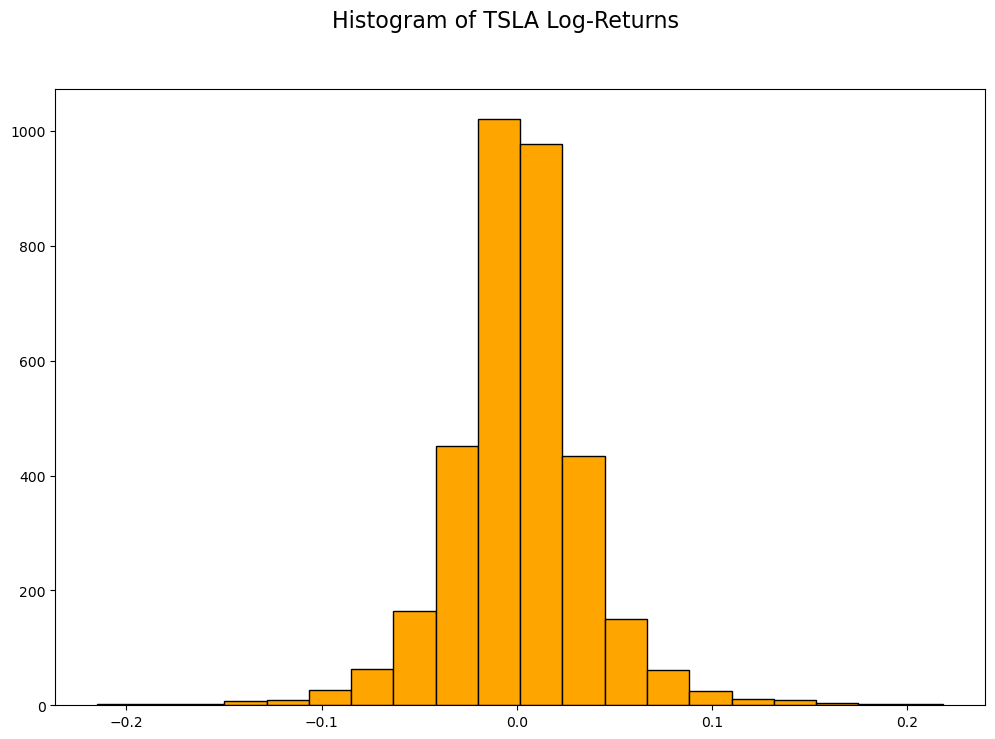

In [10]:
import matplotlib.pyplot as plt

# Assuming l_ret_vwagy and l_ret_tsla are log-returns for VOW3.DE and TSLA
# VOW3.DE log-returns
plt.figure(figsize=(12, 8))
plt.hist(l_ret_vow3de, bins=20, edgecolor='black', label='VOW3.DE Log Returns')
plt.suptitle('Histogram of VOW3.DE Log-Returns', fontsize=16)
plt.show()

# TSLA log-returns
plt.figure(figsize=(12, 8))
plt.hist(l_ret_tsla, bins=20, edgecolor='black', color='orange', label='TSLA Log Returns')
plt.suptitle('Histogram of TSLA Log-Returns', fontsize=16)
plt.show()


### 6.1.2 Important features of prices, returns, and log-returns

Let's take the price, log-prices, and log-returns of VOW3.DE and TSLA to compute and visualize some features of the log-returns. 


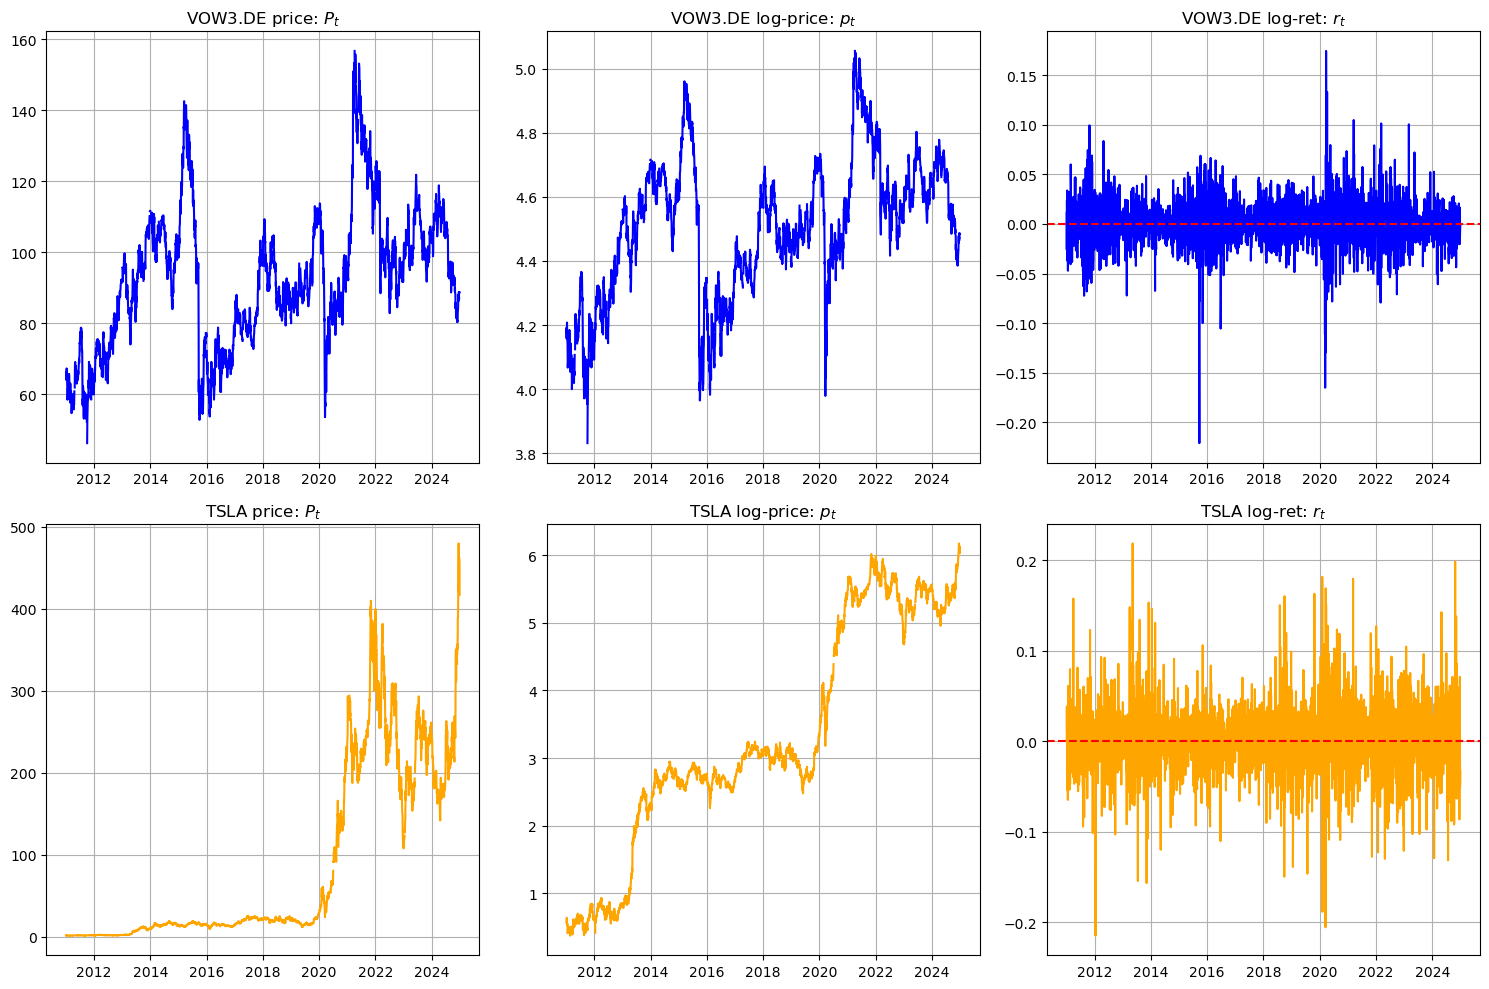

In [13]:
# Computing the log-prices for VOW3.DE and TSLA
logP_vow3de = np.log(VOW3DE)
logP_vow3de.index = VOW3DE.index
logP_tsla = np.log(TSLA)
logP_tsla.index = TSLA.index

# Set the 2x3 windows layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# VOW3.DE plots
# Daily Price
axs[0, 0].plot(VOW3DE.index, VOW3DE, color='blue')
axs[0, 0].set_title('VOW3.DE price: $P_t$')
axs[0, 0].grid(True)
# Daily log price
axs[0, 1].plot(logP_vow3de.index, logP_vow3de, color='blue')
axs[0, 1].set_title('VOW3.DE log-price: $p_t$')
axs[0, 1].grid(True)
# Daily log-returns
axs[0, 2].plot(l_ret_vow3de.index, l_ret_vow3de, color='blue')
axs[0, 2].set_title('VOW3.DE log-ret: $r_t$')
axs[0, 2].axhline(y=0, color='r', linestyle='--')
axs[0, 2].grid(True)

# TSLA plots
# Daily Price
axs[1, 0].plot(TSLA.index, TSLA, color='orange')
axs[1, 0].set_title('TSLA price: $P_t$')
axs[1, 0].grid(True)
# Daily log price
axs[1, 1].plot(logP_tsla.index, logP_tsla, color='orange')
axs[1, 1].set_title('TSLA log-price: $p_t$')
axs[1, 1].grid(True)
# Daily log-returns
axs[1, 2].plot(l_ret_tsla.index, l_ret_tsla, color='orange')
axs[1, 2].set_title('TSLA log-ret: $r_t$')
axs[1, 2].axhline(y=0, color='r', linestyle='--')
axs[1, 2].grid(True)

# Manage margins and plot
plt.tight_layout()
plt.show()

#### Autocorrelation of log-prices and log-returns

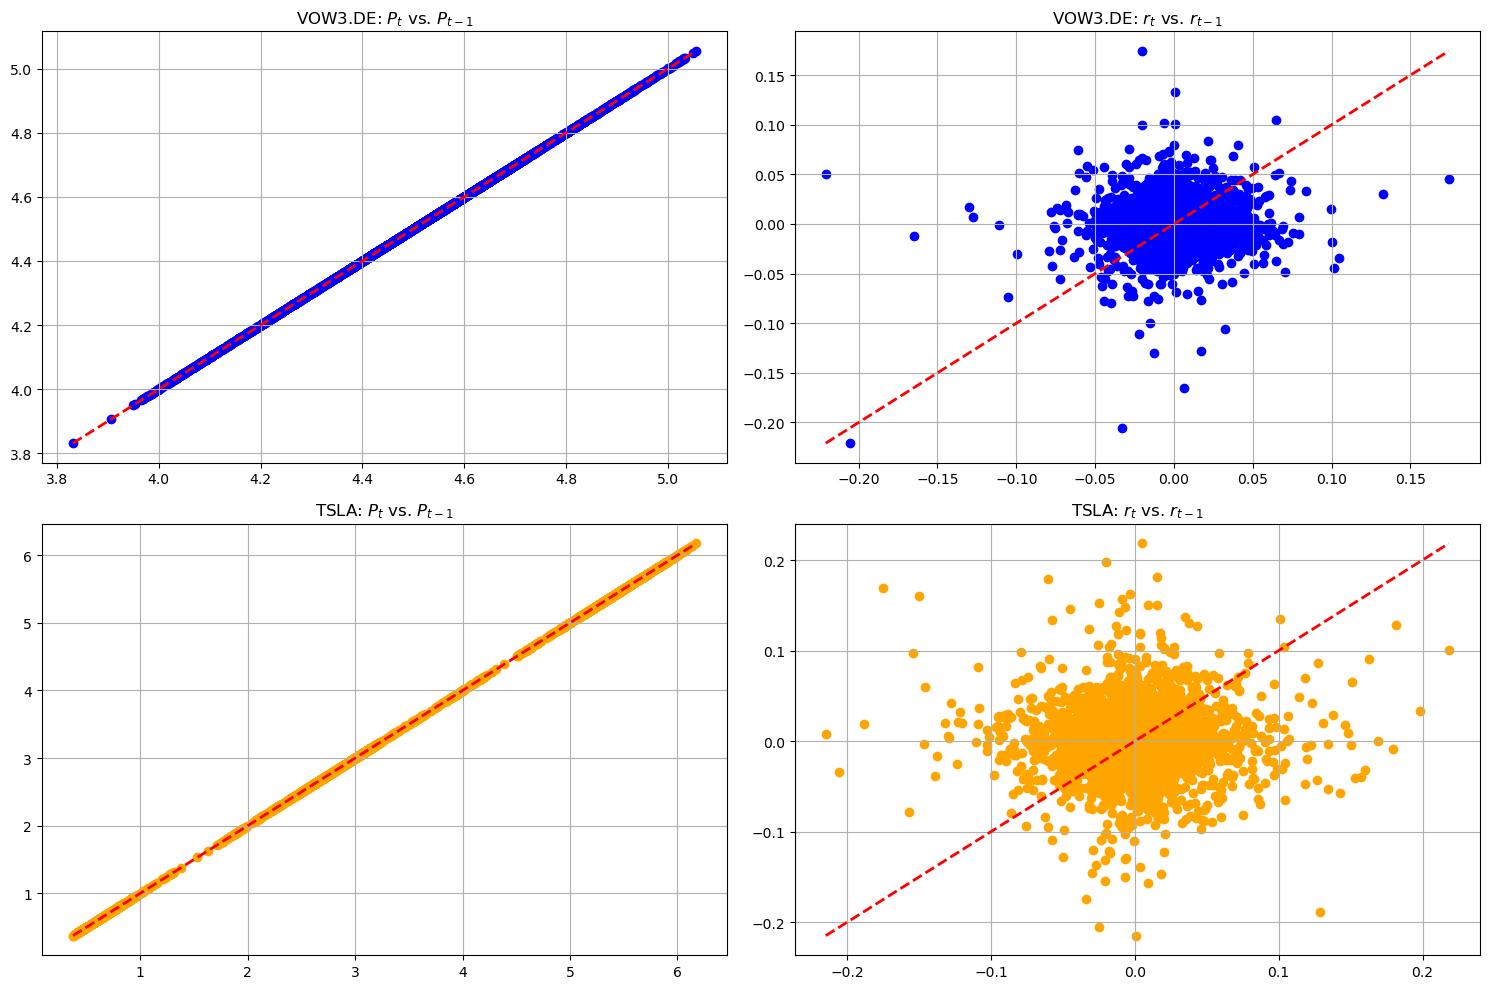

In [16]:
# Set the 2x2 windows layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# VOW3.DE plots
lp_vow3de = logP_vow3de.to_numpy()
# p_t vs. p_t-1 for VOW3.DE
axs[0, 0].scatter(logP_vow3de.shift(1)[1:], logP_vow3de[:-1], color='blue')
axs[0, 0].set_title('VOW3.DE: $P_t$ vs. $P_{t-1}$')
axs[0, 0].plot([min(lp_vow3de), max(lp_vow3de)], [min(lp_vow3de), max(lp_vow3de)], linestyle='dashed', linewidth=2, color='red')
axs[0, 0].grid(True)
# r_t vs. r_t-1 for VOW3.DE
axs[0, 1].scatter(l_ret_vow3de.shift(1), l_ret_vow3de, color='blue')
axs[0, 1].set_title('VOW3.DE: $r_t$ vs. $r_{t-1}$')
axs[0, 1].plot([min(l_ret_vow3de), max(l_ret_vow3de)], [min(l_ret_vow3de), max(l_ret_vow3de)], linestyle='dashed', linewidth=2, color='red')
axs[0, 1].grid(True)

# TSLA plots
lp_tsla = logP_tsla.to_numpy()
# p_t vs. p_t-1 for TSLA
axs[1, 0].scatter(logP_tsla.shift(1)[1:], logP_tsla[:-1], color='orange')
axs[1, 0].set_title('TSLA: $P_t$ vs. $P_{t-1}$')
axs[1, 0].plot([min(lp_tsla), max(lp_tsla)], [min(lp_tsla), max(lp_tsla)], linestyle='dashed', linewidth=2, color='red')
axs[1, 0].grid(True)
# r_t vs. r_t-1 for TSLA
axs[1, 1].scatter(l_ret_tsla.shift(1), l_ret_tsla, color='orange')
axs[1, 1].set_title('TSLA: $r_t$ vs. $r_{t-1}$')
axs[1, 1].plot([min(l_ret_tsla), max(l_ret_tsla)], [min(l_ret_tsla), max(l_ret_tsla)], linestyle='dashed', linewidth=2, color='red')
axs[1, 1].grid(True)

# Manage margins and plot
plt.tight_layout()
plt.show()

Auto-correlation function (ACF) for $k$ lags of prices and log-returns:

$$\rho(k) = \frac{\text{Cov}(X_t, X_{t-k})}{\sqrt{\text{Var}(X_t) \cdot \text{Var}(X_{t-k})}}
$$

Using the

        acf
 
function from the statsmodels library: 

        from statsmodels.tsa.stattools import acf


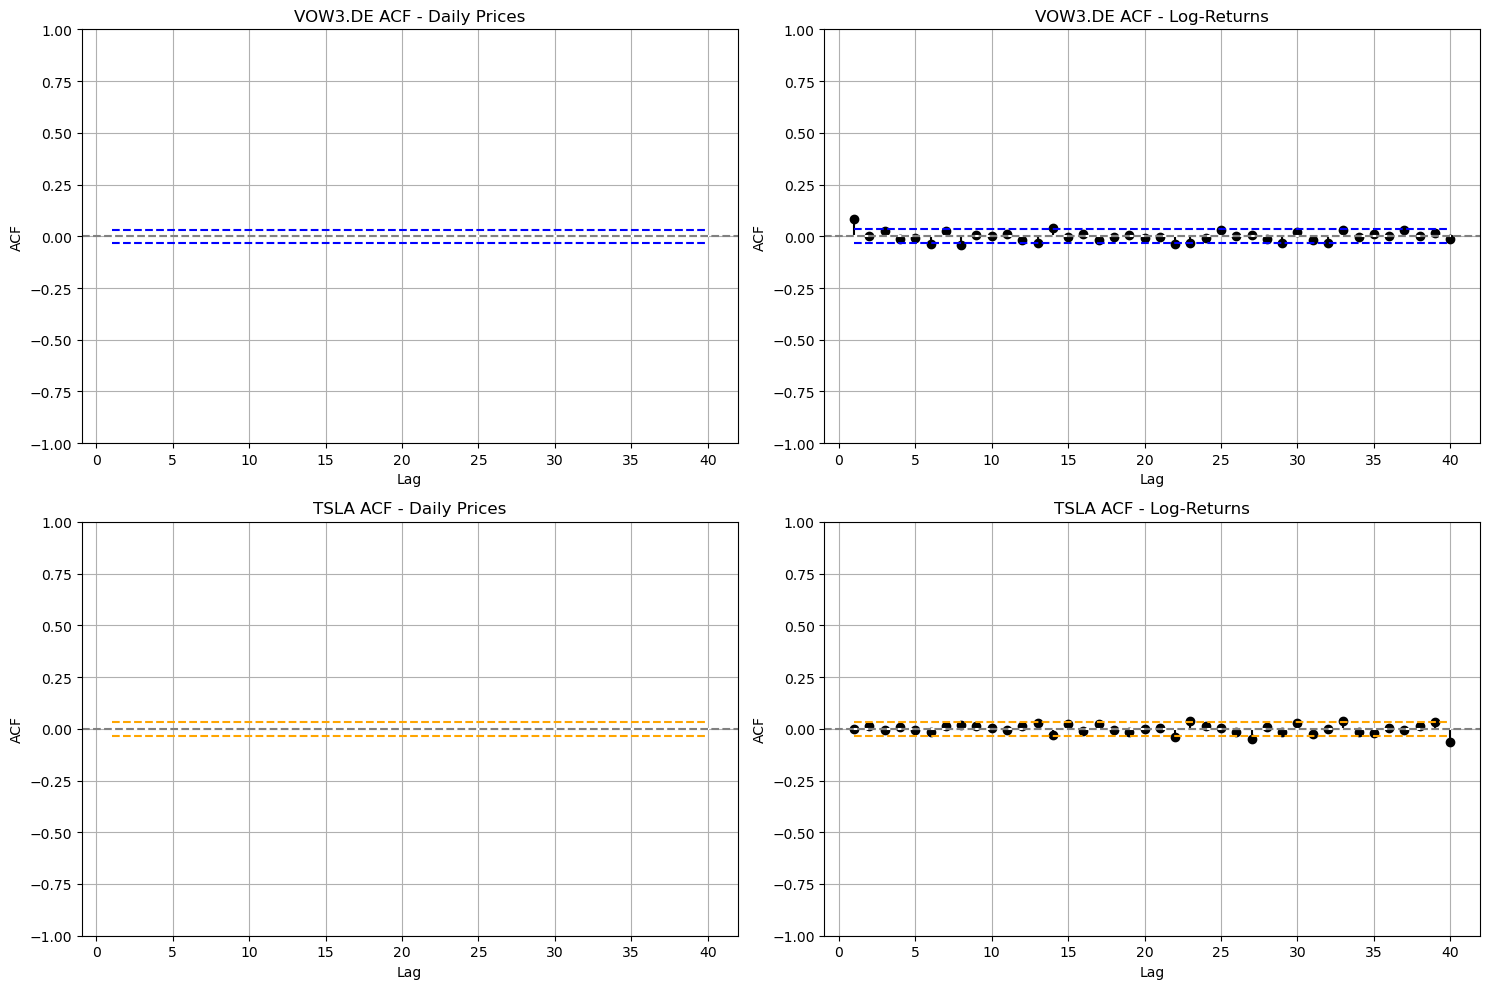

In [18]:
from statsmodels.tsa.stattools import acf

# Compute the empirical ACF for VOW3.DE and TSLA
lags = 40  # set the max lag
acf_P_vow3de = acf(VOW3DE, nlags=lags)
acf_P_tsla = acf(TSLA, nlags=lags)
acf_r_vow3de = acf(l_ret_vow3de, nlags=lags)
acf_r_tsla = acf(l_ret_tsla, nlags=lags)

# Compute the Bartlett intervals for VOW3.DE
confint_P_vow3de = 1.96 / np.sqrt(len(VOW3DE))
confint_upper_P_vow3de = np.full(lags, confint_P_vow3de)
confint_lower_P_vow3de = -np.full(lags, confint_P_vow3de)

confint_r_vow3de = 1.96 / np.sqrt(len(l_ret_vow3de))
confint_upper_r_vow3de = np.full(lags, confint_r_vow3de)
confint_lower_r_vow3de = -np.full(lags, confint_r_vow3de)

# Compute the Bartlett intervals for TSLA
confint_P_tsla = 1.96 / np.sqrt(len(TSLA))
confint_upper_P_tsla = np.full(lags, confint_P_tsla)
confint_lower_P_tsla = -np.full(lags, confint_P_tsla)

confint_r_tsla = 1.96 / np.sqrt(len(l_ret_tsla))
confint_upper_r_tsla = np.full(lags, confint_r_tsla)
confint_lower_r_tsla = -np.full(lags, confint_r_tsla)

# Set the layout for VOW3.DE and TSLA
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ACF of daily Prices for VOW3.DE
axs[0, 0].stem(np.arange(1, lags + 1), acf_P_vow3de[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0, 0].axhline(y=0, color='gray', linestyle='--')
axs[0, 0].plot(np.arange(1, lags + 1), confint_upper_P_vow3de, color='blue', linestyle='dashed')
axs[0, 0].plot(np.arange(1, lags + 1), confint_lower_P_vow3de, color='blue', linestyle='dashed')
axs[0, 0].set_ylim(-1, 1)
axs[0, 0].set_title('VOW3.DE ACF - Daily Prices')
axs[0, 0].set_xlabel('Lag')
axs[0, 0].set_ylabel('ACF')
axs[0, 0].grid(True)

# ACF of daily log-returns for VOW3.DE
axs[0, 1].stem(np.arange(1, lags + 1), acf_r_vow3de[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0, 1].axhline(y=0, color='gray', linestyle='--')
axs[0, 1].plot(np.arange(1, lags + 1), confint_upper_r_vow3de, color='blue', linestyle='dashed')
axs[0, 1].plot(np.arange(1, lags + 1), confint_lower_r_vow3de, color='blue', linestyle='dashed')
axs[0, 1].set_ylim(-1, 1)
axs[0, 1].set_title('VOW3.DE ACF - Log-Returns')
axs[0, 1].set_xlabel('Lag')
axs[0, 1].set_ylabel('ACF')
axs[0, 1].grid(True)

# ACF of daily Prices for TSLA
axs[1, 0].stem(np.arange(1, lags + 1), acf_P_tsla[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1, 0].axhline(y=0, color='gray', linestyle='--')
axs[1, 0].plot(np.arange(1, lags + 1), confint_upper_P_tsla, color='orange', linestyle='dashed')
axs[1, 0].plot(np.arange(1, lags + 1), confint_lower_P_tsla, color='orange', linestyle='dashed')
axs[1, 0].set_ylim(-1, 1)
axs[1, 0].set_title('TSLA ACF - Daily Prices')
axs[1, 0].set_xlabel('Lag')
axs[1, 0].set_ylabel('ACF')
axs[1, 0].grid(True)

# ACF of daily log-returns for TSLA
axs[1, 1].stem(np.arange(1, lags + 1), acf_r_tsla[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1, 1].axhline(y=0, color='gray', linestyle='--')
axs[1, 1].plot(np.arange(1, lags + 1), confint_upper_r_tsla, color='orange', linestyle='dashed')
axs[1, 1].plot(np.arange(1, lags + 1), confint_lower_r_tsla, color='orange', linestyle='dashed')
axs[1, 1].set_ylim(-1, 1)
axs[1, 1].set_title('TSLA ACF - Log-Returns')
axs[1, 1].set_xlabel('Lag')
axs[1, 1].set_ylabel('ACF')
axs[1, 1].grid(True)

# Manage margins and plot
plt.tight_layout()
plt.show()

To test the autocorrelation, we use the **Box-Pierce** and **Ljung-Box** tests. 
The Box-Pierce is an approximation of the Ljung-Box test. Check the results for lag = 1 using: 

    import statsmodels.api as sm
    import scipy.stats as stats

**Squared** (log-)returns:

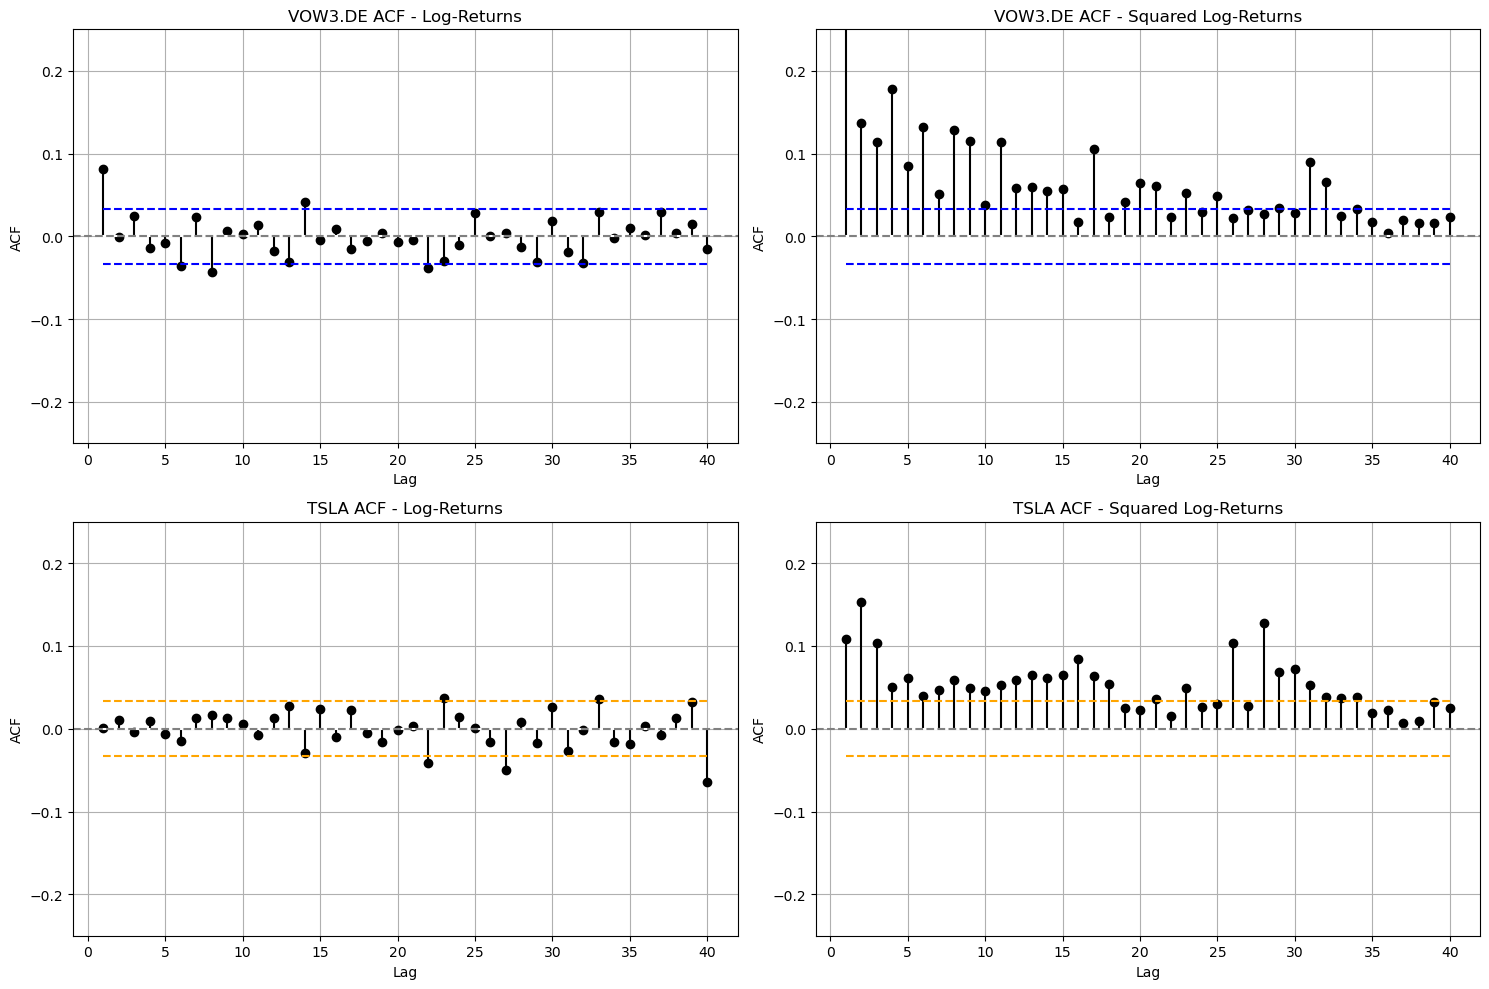

In [21]:
from statsmodels.tsa.stattools import acf

# Compute the empirical ACF for VOW3.DE and TSLA
lags = 40 # set the max lag
acf_r_vow3de = acf(l_ret_vow3de, nlags=lags)
acf_r2_vow3de = acf(l_ret_vow3de**2, nlags=lags)
acf_r_tsla = acf(l_ret_tsla, nlags=lags)
acf_r2_tsla = acf(l_ret_tsla**2, nlags=lags)

# Compute the Bartlett intervals (same for both VOW3.DE and TSLA)
confint_r_vow3de = 1.96 / np.sqrt(len(l_ret_vow3de))
confint_upper_r_vow3de = np.full(lags, confint_r_vow3de)
confint_lower_r_vow3de = -np.full(lags, confint_r_vow3de)
confint_r_tsla = 1.96 / np.sqrt(len(l_ret_tsla))
confint_upper_r_tsla = np.full(lags, confint_r_tsla)
confint_lower_r_tsla = -np.full(lags, confint_r_tsla)

# Set the layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ACF of daily log-returns for VOW3.DE
axs[0, 0].stem(np.arange(1, lags + 1), acf_r_vow3de[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0, 0].axhline(y=0, color='gray', linestyle='--')
axs[0, 0].plot(np.arange(1, lags + 1), confint_upper_r_vow3de, color='blue', linestyle='dashed')
axs[0, 0].plot(np.arange(1, lags + 1), confint_lower_r_vow3de, color='blue', linestyle='dashed')
axs[0, 0].set_ylim(-.25, .25)
axs[0, 0].set_title('VOW3.DE ACF - Log-Returns')
axs[0, 0].set_xlabel('Lag')
axs[0, 0].set_ylabel('ACF')
axs[0, 0].grid(True)

# ACF of squared log-returns for VOW3.DE
axs[0, 1].stem(np.arange(1, lags + 1), acf_r2_vow3de[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0, 1].axhline(y=0, color='gray', linestyle='--')
axs[0, 1].plot(np.arange(1, lags + 1), confint_upper_r_vow3de, color='blue', linestyle='dashed')
axs[0, 1].plot(np.arange(1, lags + 1), confint_lower_r_vow3de, color='blue', linestyle='dashed')
axs[0, 1].set_ylim(-.25, .25)
axs[0, 1].set_title('VOW3.DE ACF - Squared Log-Returns')
axs[0, 1].set_xlabel('Lag')
axs[0, 1].set_ylabel('ACF')
axs[0, 1].grid(True)

# ACF of daily log-returns for TSLA
axs[1, 0].stem(np.arange(1, lags + 1), acf_r_tsla[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1, 0].axhline(y=0, color='gray', linestyle='--')
axs[1, 0].plot(np.arange(1, lags + 1), confint_upper_r_tsla, color='orange', linestyle='dashed')
axs[1, 0].plot(np.arange(1, lags + 1), confint_lower_r_tsla, color='orange', linestyle='dashed')
axs[1, 0].set_ylim(-.25, .25)
axs[1, 0].set_title('TSLA ACF - Log-Returns')
axs[1, 0].set_xlabel('Lag')
axs[1, 0].set_ylabel('ACF')
axs[1, 0].grid(True)

# ACF of squared log-returns for TSLA
axs[1, 1].stem(np.arange(1, lags + 1), acf_r2_tsla[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1, 1].axhline(y=0, color='gray', linestyle='--')
axs[1, 1].plot(np.arange(1, lags + 1), confint_upper_r_tsla, color='orange', linestyle='dashed')
axs[1, 1].plot(np.arange(1, lags + 1), confint_lower_r_tsla, color='orange', linestyle='dashed')
axs[1, 1].set_ylim(-.25, .25)
axs[1, 1].set_title('TSLA ACF - Squared Log-Returns')
axs[1, 1].set_xlabel('Lag')
axs[1, 1].set_ylabel('ACF')
axs[1, 1].grid(True)

# Set the space
plt.tight_layout()
plt.show()


**Why?**

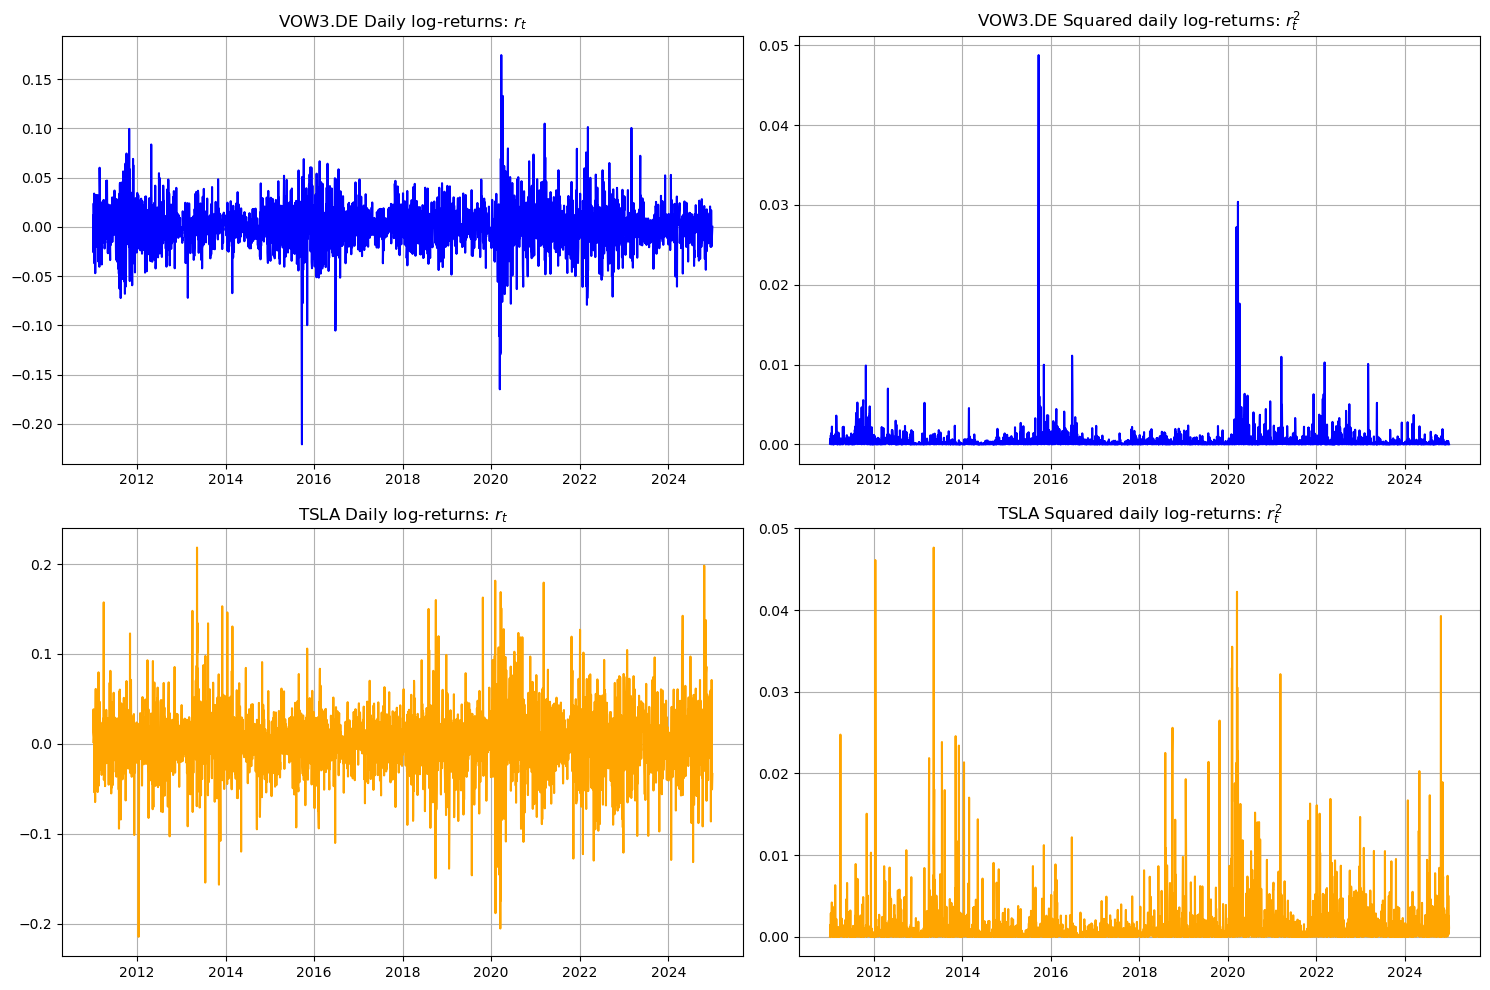

In [23]:
# Set the 2x2 windows layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Daily log-returns for VOW3.DE
axs[0, 0].plot(l_ret_vow3de.index, l_ret_vow3de, color='blue')
axs[0, 0].set_title('VOW3.DE Daily log-returns: $r_t$')
axs[0, 0].grid(True)

# Squared daily log-returns for VOW3.DE
axs[0, 1].plot(l_ret_vow3de.index, l_ret_vow3de**2, color='blue')
axs[0, 1].set_title('VOW3.DE Squared daily log-returns: $r_t^2$')
axs[0, 1].grid(True)

# Daily log-returns for TSLA
axs[1, 0].plot(l_ret_tsla.index, l_ret_tsla, color='orange')
axs[1, 0].set_title('TSLA Daily log-returns: $r_t$')
axs[1, 0].grid(True)

# Squared daily log-returns for TSLA
axs[1, 1].plot(l_ret_tsla.index, l_ret_tsla**2, color='orange')
axs[1, 1].set_title('TSLA Squared daily log-returns: $r_t^2$')
axs[1, 1].grid(True)

# Manage margins and plot
plt.tight_layout()
plt.show()

### Log-returns distribution 

Let's check the distribution of a generic time series of (log-)returns. 
Before checking for the normal distribution, let me compute the **monthly** and **annual returns**. Then, we will check the ditribution for these three time-series. 

For this application, we will use the S\&P500 prices.

In [26]:
# SP500 index
sp500 = yf.download("^GSPC", start="1951-12-31", end="2018-12-31")
sp500

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1951-12-31,23.770000,23.770000,23.770000,23.770000,1440000
1952-01-02,23.799999,23.799999,23.799999,23.799999,1070000
1952-01-03,23.879999,23.879999,23.879999,23.879999,1220000
1952-01-04,23.920000,23.920000,23.920000,23.920000,1480000
1952-01-07,23.910000,23.910000,23.910000,23.910000,1540000
...,...,...,...,...,...
2018-12-21,2416.620117,2504.409912,2408.550049,2465.379883,7657890000
2018-12-24,2351.100098,2410.340088,2351.100098,2400.560059,2613670000


In [27]:
# select the adj closing prices
P = sp500["Close"]
# and compute the logPrices
logP = np.log(P)
logP.index = sp500.index

# extract the weekly, monthly, and annual log-prices from the daily time-series of log-prices
pt_w = logP.resample('W').last()
pt_m = logP.resample('ME').last()
pt_a = logP.resample('YE').last()

# and compute the returns at all frequencies
rt_d = logP.diff().dropna() #dropna remove the first NaN
rt_w = pt_w.diff().dropna()  
rt_m = pt_m.diff().dropna()     
rt_a = pt_a.diff().dropna() 

In [28]:
rt_d

Ticker,^GSPC
Date,
1952-01-02,0.001261
1952-01-03,0.003356
1952-01-04,0.001674
1952-01-07,-0.000418
1952-01-08,-0.003771
...,...
2018-12-21,-0.020803
2018-12-24,-0.027487
2018-12-26,0.048403


To represent the QQ-plot(Quantile-Quantile plot), we will use the scipy library. In particular, we will use the submodule stats:

        import scipy.stats as stats


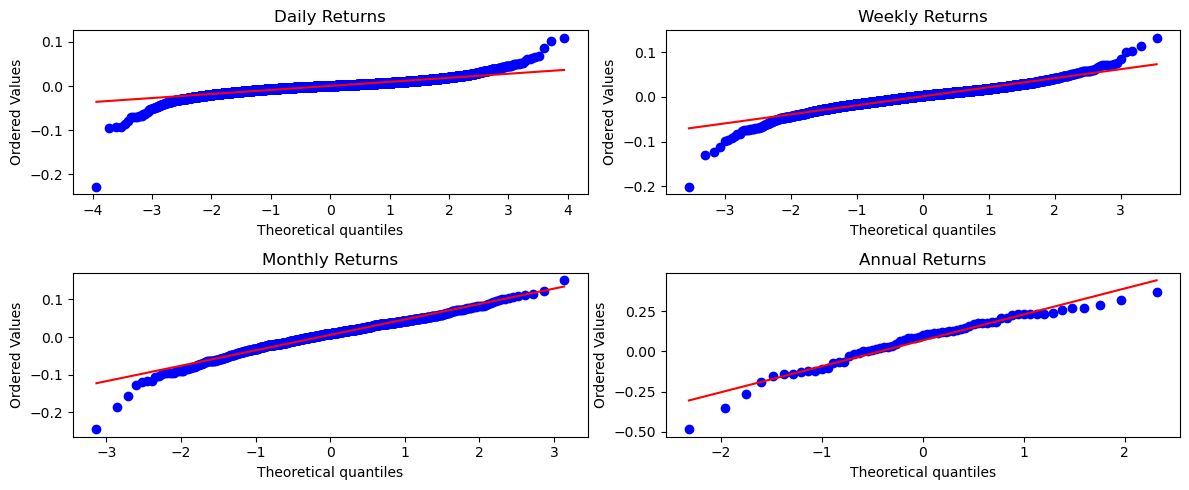

In [31]:
### QQ-plot (Normal distribution)

import scipy.stats as stats

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

# Probability Plot for Daily Returns
stats.probplot(rt_d["^GSPC"], dist="norm", plot=axs[0,0]) #dist="norm": Comparing with normal distribution
axs[0,0].set_title("Daily Returns")

# Probability Plot for Weekly Returns
stats.probplot(rt_w["^GSPC"], dist="norm", plot=axs[0,1])
axs[0,1].set_title("Weekly Returns")

# Probability Plot for Monthly Returns
stats.probplot(rt_m["^GSPC"], dist="norm", plot=axs[1,0])
axs[1,0].set_title("Monthly Returns")

# Probability Plot for Annual Returns
stats.probplot(rt_a["^GSPC"], dist="norm", plot=axs[1,1])
axs[1,1].set_title("Annual Returns")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

This phenomenon is called: **Aggregational Gaussianity**

Let's see it by overlapping a normal density to the empirical distribution of $r_{t,d}$ and $r_{t,m}$ using:

        stats.norm.pdf(x, loc,scale)
        


/opt/anaconda3/envs/pyfi/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


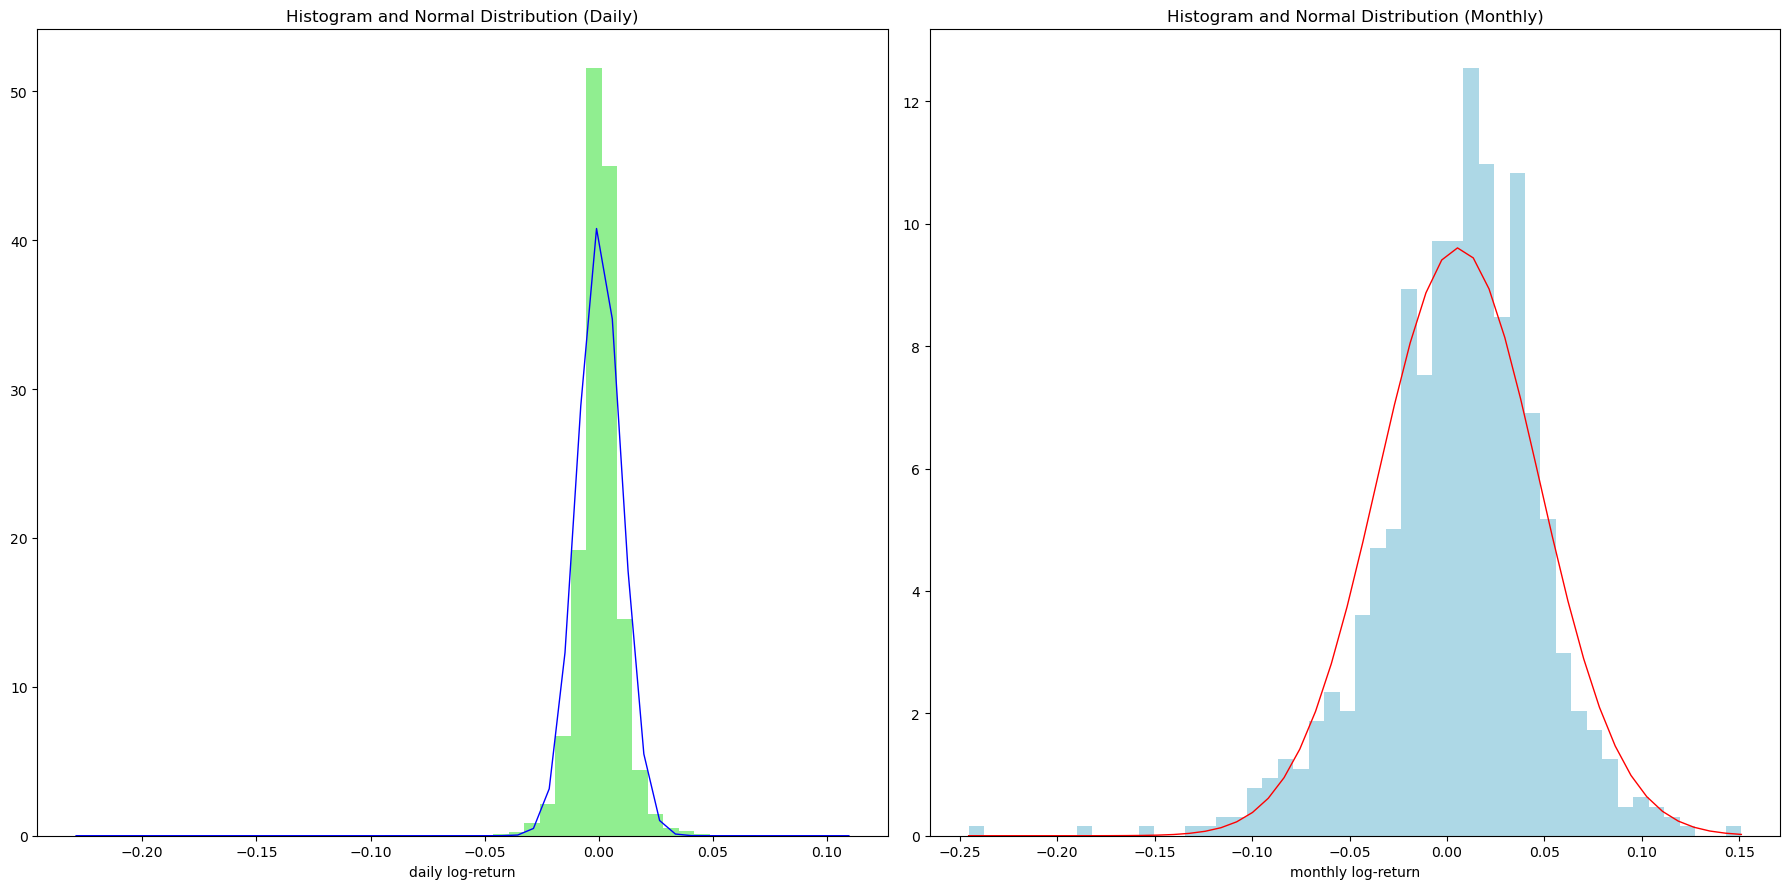

In [33]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

# Histogram and Normal Distribution (Daily)
axs[0].hist(rt_d["^GSPC"], bins=50, density=True, color="lightgreen")
norm_y = stats.norm.pdf(np.linspace(rt_d.min(), rt_d.max()), loc=np.mean(rt_d), scale=np.std(rt_d))
axs[0].plot(np.linspace(rt_d.min(), rt_d.max()), norm_y, color="blue", linewidth=1)
axs[0].set_xlabel("daily log-return")
axs[0].set_title("Histogram and Normal Distribution (Daily)")

# Histogram and Normal Distribution (Monthly)
axs[1].hist(rt_m["^GSPC"], bins=50, density=True, color="lightblue")
norm_y = stats.norm.pdf(np.linspace(rt_m.min(), rt_m.max()), loc=np.mean(rt_m), scale=np.std(rt_m))
axs[1].plot(np.linspace(rt_m.min(), rt_m.max()), norm_y, color="red", linewidth=1)
axs[1].set_xlabel("monthly log-return")
axs[1].set_title("Histogram and Normal Distribution (Monthly)")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Normality Test 

We use the Jarque-Bera test to conclude on the aggregational gaussianity. 
This test assesses the normality of a sample distribution, revealing any deviations from the symmetry and kurtosis expected in a normal distribution. 

Before running the test, we compute the Skewness and the Kurtosis of our time-series. 

We use the functions

        skew and kurtosis

available in the module 
        
        scipy.stats

so: 

        from scipy.stats import skew, kurtosis

In [36]:
from scipy.stats import skew, kurtosis

Moments = {
    'Frequency': ['Daily', 'Weekly', 'Monthly', 'Annual'],
    'Skewness': [round(skew(rt_d["^GSPC"]), 5), round(skew(rt_w["^GSPC"]), 5), round(skew(rt_m["^GSPC"]), 5), round(skew(rt_a["^GSPC"]), 5)],
    'Kurtosis': [round(kurtosis(rt_d["^GSPC"]), 5), round(kurtosis(rt_w["^GSPC"]), 5), round(kurtosis(rt_m["^GSPC"]), 5), round(kurtosis(rt_a["^GSPC"]), 5)]
}
# kurtosis -3
Moments = pd.DataFrame(Moments)
Moments

,Frequency,Skewness,Kurtosis
0,Daily,-1.00174,27.13443
1,Weekly,-0.58650,5.76277
2,Monthly,-0.66840,2.48174
3,Annual,-0.87665,1.02711


Now, we can run the test using the built-in function jarque_bera available in the same module.

In [46]:
from scipy.stats import jarque_bera

print("JB p-value", "daily", "returns:", jarque_bera(rt_d["^GSPC"])[1])
print("JB p-value", "weekly", "returns:", jarque_bera(rt_w["^GSPC"])[1])
print("JB p-value", "monthly", "returns:", jarque_bera(rt_m["^GSPC"])[1])
print("JB p-value", "annual", "returns:", jarque_bera(rt_a["^GSPC"])[1])

JB p-value daily returns: 0.0
JB p-value weekly returns: 0.0
JB p-value monthly returns: 1.5735898333858343e-58
JB p-value annual returns: 0.00314032957432353


## 6.2 Asset Pricing

### 6.2.1 The Capital Asset Pricing Model

Given a company $i$, we model the returns as:
$$r_i = \alpha + \beta (Mkt-RF),$$
where $Mkt$-$RF$ is the excess return of the market over the risk-free rate (RF).

For the first application, we will consider: 

 - RF = 1%;
   
 - Mkt = the SP500;
    
 - $i$ = VOW3.DE and TSLA
 
 - Period: Jan 2018- Dec 2024

We can estimate the parameters using a simple **Ordinary Least Squares** (OLS) regression.

Parameters: 

$$ \hat{\beta} = \frac{Cov(r_i,r_{mkt})}{Var(r_{mkt})}, $$
$$ \hat{\alpha} = \bar{r}_i - \hat{\beta} \bar{r}_{mkt} $$

*psss*: we will use the cross-deviance (codeviance) and the deviance instead of the covariance and variance, respectively. 

#### The interpretation of $\alpha$ and $\beta$

Here, $\beta$ measures an asset's sensitivity to overall market risk. 
For a generic asset or portfolio $i$: 
1. **Beta = 1**,  same volatility as the market.
2. **Beta > 1**, higher volatility than the market.
3. **Beta < 1**, lower volatility than the market.
4. **Negative beta**, inverse relationship with the market.

In [50]:
import numpy as np

# Get data for VOW3.DE and TSLA
P_i_vow3de = yf.download(tickers="VOW3.DE", start="2018-01-01", end="2024-12-31")
P_i_tsla = yf.download(tickers="TSLA", start="2018-01-01", end="2024-12-31")
P_mkt = yf.download(tickers="^GSPC", start="2018-01-01", end="2024-12-31")

# Align data by merging on the date index, keeping only rows with values for all tickers
aligned_data = P_i_vow3de[['Close']].rename(columns={'Close': 'VOW3.DE'}).join(
    P_i_tsla[['Close']].rename(columns={'Close': 'TSLA'}),
    how = 'inner').join(
    P_mkt[['Close']].rename(columns={'Close': '^GSPC'}),
    how = 'inner')

# Compute log returns for the aligned data
aligned_data = aligned_data.dropna()  # Ensure no missing values in the aligned data

r_i_vow3de = np.log(aligned_data['VOW3.DE'] / aligned_data['VOW3.DE'].shift(1)).dropna()
r_i_tsla = np.log(aligned_data['TSLA'] / aligned_data['TSLA'].shift(1)).dropna()
r_mkt = np.log(aligned_data['^GSPC'] / aligned_data['^GSPC'].shift(1)).dropna()

# Ensure alignment of indices for all log returns
r_i_vow3de = r_i_vow3de.loc[r_mkt.index]
r_i_tsla = r_i_tsla.loc[r_mkt.index]





[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [52]:
# convert the rf in daily basis (common error)
rf = 0.05
rf_d = (1 + rf) ** (1/252) - 1

# Compute the excess returns for VOW3.DE
e_i_vow3de = r_i_vow3de["VOW3.DE"] - rf_d
e_mkt = r_mkt["^GSPC"] - rf

# Compute the mean of excess returns
mu_i_vow3de = np.mean(e_i_vow3de)
mu_mkt = np.mean(e_mkt)

# Estimate beta CAPM for VOW3.DE
codev_vow3de = np.sum((e_mkt - mu_mkt) * (e_i_vow3de - mu_mkt))  # Use .values to ensure compatibility
dev = np.sum((e_mkt - mu_mkt) ** 2)

beta_vow3de = codev_vow3de / dev
alpha_vow3de = mu_i_vow3de - beta_vow3de * mu_mkt

print("VOW3.DE - Intercept (Alpha):", alpha_vow3de)
print("VOW3.DE - Slope (Beta):", beta_vow3de)

# Compute the excess returns for TSLA
e_i_tsla = r_i_tsla["TSLA"] - rf_d

mu_i_tsla = np.mean(e_i_tsla)

# Estimate beta CAPM for TSLA
codev_tsla = np.sum((e_mkt - mu_mkt) * (e_i_tsla - mu_mkt))  # Use .values to ensure compatibility

beta_tsla = codev_tsla / dev
alpha_tsla = mu_i_tsla - beta_tsla * mu_mkt

print("TSLA - Intercept (Alpha):", alpha_tsla)
print("TSLA - Slope (Beta):", beta_tsla)



VOW3.DE - Intercept (Alpha): 0.03780806473674306
VOW3.DE - Slope (Beta): 0.767929939749776
TSLA - Intercept (Alpha): 0.07757390082273591
TSLA - Slope (Beta): 1.5349099901416432


#### Using linear algebra

In [55]:
# define the matrix X (a column of ones & the e_mkt)

X = np.column_stack((np.ones_like(e_mkt), e_mkt))

# Compute beta using linear algebra for VOW3.DE
beta2_vow3de = np.linalg.inv(X.T @ X) @ X.T @ e_i_vow3de
alpha_vow3de = beta2_vow3de[0]
beta_vow3de = beta2_vow3de[1]
print("VOW3.DE - Intercept (Alpha):", alpha_vow3de)
print("VOW3.DE - Slope (Beta):", beta_vow3de)

# Compute beta using linear algebra for TSLA
beta2_tsla = np.linalg.inv(X.T @ X) @ X.T @ e_i_tsla
alpha_tsla = beta2_tsla[0]
beta_tsla = beta2_tsla[1]
print("TSLA - Intercept (Alpha):", alpha_tsla)
print("TSLA - Slope (Beta):", beta_tsla)


VOW3.DE - Intercept (Alpha): 0.03780806473674339
VOW3.DE - Slope (Beta): 0.7679299397497816
TSLA - Intercept (Alpha): 0.0775739008227366
TSLA - Slope (Beta): 1.5349099901416547


#### ...and finallly using the built-in function contained in the module statsmodels

In [58]:
import statsmodels.api as sm

# Fit OLS model for VOW3.DE
X = sm.add_constant(e_mkt)

model_vow3de = sm.OLS(e_i_vow3de, X)
results_vow3de = model_vow3de.fit()
alpha_vow3de_ols = results_vow3de.params[0]
beta_vow3de_ols = results_vow3de.params[1]

print(results_vow3de.summary())


# Fit OLS model for TSLA
model_tsla = sm.OLS(e_i_tsla, X)
results_tsla = model_tsla.fit()
alpha_tsla_ols = results_tsla.params[0]
beta_tsla_ols = results_tsla.params[1]

print(results_tsla.summary())

                            OLS Regression Results                            
Dep. Variable:                VOW3.DE   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     431.5
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           9.57e-86
Time:                        16:28:10   Log-Likelihood:                 4384.7
No. Observations:                1730   AIC:                            -8765.
Df Residuals:                    1728   BIC:                            -8755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0378      0.002     20.017      0.0

/var/folders/rh/pltg0p6n595gtqxsb_41llph0000gn/T/ipykernel_58554/4125381390.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_vow3de_ols = results_vow3de.params[0]
/var/folders/rh/pltg0p6n595gtqxsb_41llph0000gn/T/ipykernel_58554/4125381390.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_vow3de_ols = results_vow3de.params[1]
/var/folders/rh/pltg0p6n595gtqxsb_41llph0000gn/T/ipykernel_58554/4125381390.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

#### Fitted vs. Observed plot

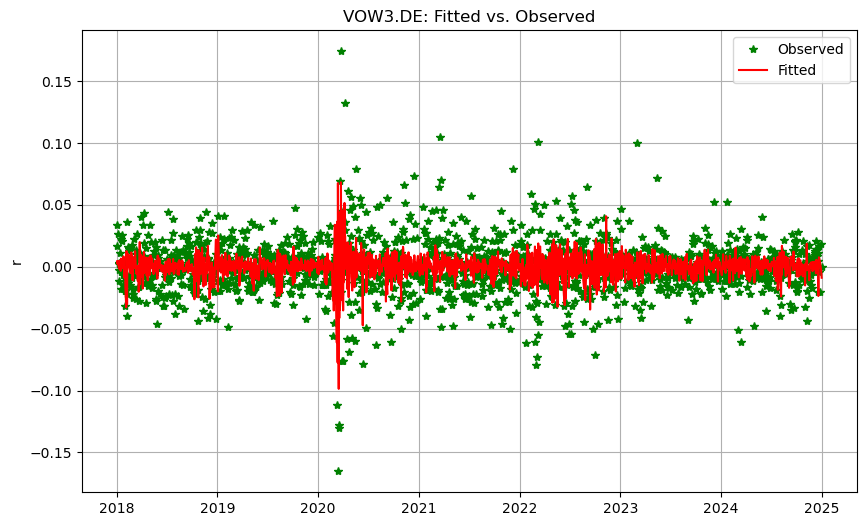

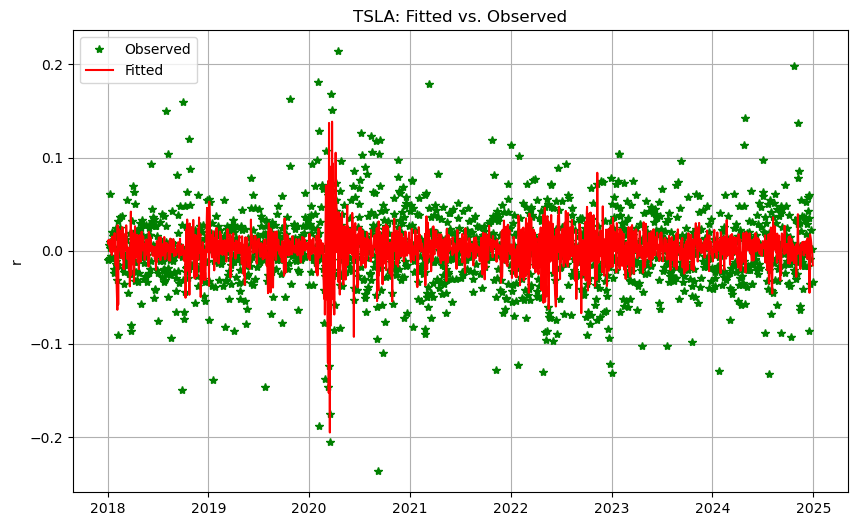

In [61]:
# Extract the fitted values for VOW3.DE
fitted_vow3de = results_vow3de.fittedvalues

# Fitted vs. Observed for VOW3.DE
plt.figure(figsize=(10, 6))
plt.plot(e_i_vow3de.index, e_i_vow3de, 'g*', label='Observed')  
plt.plot(e_i_vow3de.index, fitted_vow3de, 'r-', label='Fitted')  
plt.ylabel('r')
plt.title('VOW3.DE: Fitted vs. Observed')
plt.legend()
plt.grid(True)
plt.show()


# Extract the fitted values for TSLA
fitted_tsla = results_tsla.fittedvalues

# Fitted vs. Observed for TSLA
plt.figure(figsize=(10, 6))
plt.plot(e_i_tsla.index, e_i_tsla, 'g*', label='Observed')  
plt.plot(e_i_tsla.index, fitted_tsla, 'r-', label='Fitted')  
plt.ylabel('r')
plt.title('TSLA: Fitted vs. Observed')
plt.legend()
plt.grid(True)
plt.show()


#### Fitted vs. Observed v2

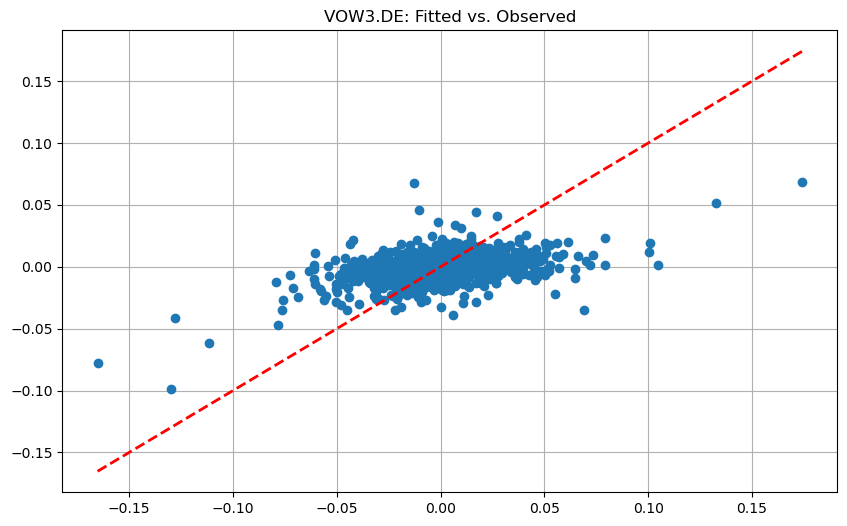

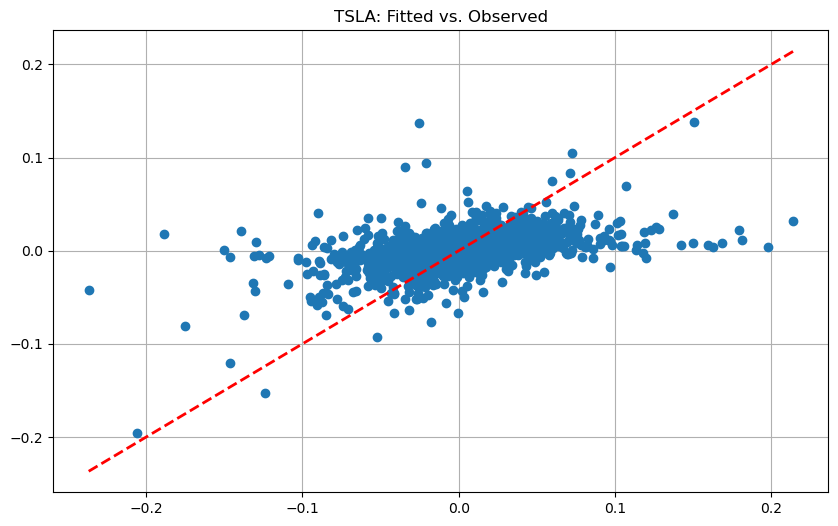

In [63]:
# scatter for VOW3.DE
plt.figure(figsize=(10, 6))
plt.plot(e_i_vow3de, fitted_vow3de, 'o')  
plt.plot([min(e_i_vow3de), max(e_i_vow3de)], [min(e_i_vow3de), max(e_i_vow3de)], linestyle='dashed', linewidth=2, color='red')
plt.title('VOW3.DE: Fitted vs. Observed')
plt.grid(True)
plt.show()

# scatter for TSLA
plt.figure(figsize=(10, 6))
plt.plot(e_i_tsla, fitted_tsla, 'o')  
plt.plot([min(e_i_tsla), max(e_i_tsla)], [min(e_i_tsla), max(e_i_tsla)], linestyle='dashed', linewidth=2, color='red')
plt.title('TSLA: Fitted vs. Observed')
plt.grid(True)
plt.show()



In [66]:
print("Shape of e_mkt:", e_mkt.shape)
print("Shape of e_i_vow3de:", e_i_vow3de.shape)
print("Shape of e_i_tsla:", e_i_tsla.shape)
print("Shape of X:", X.shape)


Shape of e_mkt: (1730,)
Shape of e_i_vow3de: (1730,)
Shape of e_i_tsla: (1730,)
Shape of X: (1730, 2)


### 6.2.2 Fama-French data

The Fama-French three-factor model (now the five-factor model is also available) extends the Capital Asset Pricing Model (CAPM) by introducing two additional factors: 
- size and 
- value. 

  - FF3FM: $r_i = \alpha + \beta_1 (Mkt-RF)+ \beta_2 SMB + \beta_3 HML$

where: 

- **SMB** (Small Minus Big): The difference between the returns of small-capitalization stocks and large-capitalization stocks.
- **HML** (High Minus Low): The difference between the returns of stocks with a high book-to-market ratio and those with a low book-to-market ratio.

We willl use:

        pandas_datareader.data 
        
to import directly a table from a url

In [163]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas_datareader.data as pdr
import datetime

# Set the interval
start_date = datetime.datetime(2011,1,1)
end_date = datetime.datetime(2024, 12,31)

# Get the Fama-French Daily data
ff_data = pdr.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=start_date, end=end_date)[0]

ff_data.info()

/var/folders/rh/pltg0p6n595gtqxsb_41llph0000gn/T/ipykernel_58554/1263575819.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = pdr.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=start_date, end=end_date)[0]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3501 entries, 2011-01-03 to 2024-11-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  3501 non-null   float64
 1   SMB     3501 non-null   float64
 2   HML     3501 non-null   float64
 3   RF      3501 non-null   float64
dtypes: float64(4)
memory usage: 136.8 KB


In [71]:
# scale ff_data by dividing by 100
ff_data1 = ff_data/100

# Merge the two dataframes by the date-time index for VOW3.DE 
merged_df_vow3de = ff_data1.merge(r_i_vow3de, left_index=True, right_index=True)
merged_df_vow3de['e_i_vow3de'] = merged_df_vow3de['VOW3.DE'] - merged_df_vow3de['RF']

# Merge the two dataframes by the date-time index for TSLA
merged_df_tsla = ff_data1.merge(r_i_tsla, left_index=True, right_index=True)
merged_df_tsla['e_i_tsla'] = merged_df_tsla['TSLA'] - merged_df_tsla['RF']

# Output the merged dataframe
merged_df_combined = merged_df_vow3de.merge(merged_df_tsla[['TSLA', 'e_i_tsla']], left_index=True, right_index=True)
merged_df_combined

,Mkt-RF,SMB,HML,RF,VOW3.DE,e_i_vow3de,TSLA,e_i_tsla
Date,,,,,,,,
2018-01-03,0.0059,-0.0039,-0.0018,0.00006,0.034054,0.033994,-0.010286,-0.010346
2018-01-04,0.0042,-0.0026,0.0024,0.00006,0.017348,0.017288,-0.008325,-0.008385
2018-01-05,0.0066,-0.0036,-0.0026,0.00006,0.026922,0.026862,0.006210,0.006150
2018-01-08,0.0019,-0.0015,0.0004,0.00006,0.003565,0.003505,0.060755,0.060695
2018-01-09,0.0015,-0.0034,-0.0003,0.00006,0.002222,0.002162,-0.008118,-0.008178
...,...,...,...,...,...,...,...,...
2024-11-22,0.0054,0.0125,0.0041,0.00020,0.006870,0.006670,0.037335,0.037135
2024-11-25,0.0040,0.0107,0.0027,0.00020,0.000000,-0.000200,-0.040431,-0.040631
2024-11-26,0.0042,-0.0092,-0.0071,0.00020,-0.016766,-0.016966,-0.001064,-0.001264


In [73]:
# extract y and X for VOW3.DE
y = merged_df_vow3de['e_i_vow3de']
X = merged_df_vow3de[['Mkt-RF', 'SMB', 'HML']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
ff3model = sm.OLS(y, X)
ff3fit = ff3model.fit()

# print the summary
print(ff3fit.summary())


# extract y and X for TSLA
y = merged_df_tsla['e_i_tsla']
X = merged_df_tsla[['Mkt-RF', 'SMB', 'HML']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
ff3model = sm.OLS(y, X)
ff3fit = ff3model.fit()

# print the summary
print(ff3fit.summary())

                            OLS Regression Results                            
Dep. Variable:             e_i_vow3de   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 17 Jan 2025   Prob (F-statistic):          5.73e-112
Time:                        16:28:38   Log-Likelihood:                 4401.9
No. Observations:                1712   AIC:                            -8796.
Df Residuals:                    1708   BIC:                            -8774.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.178      0.2

In [75]:
import pandas_datareader.data as pdr
import datetime

# Set the interval
start_date = datetime.datetime(2011,1,1)
end_date = datetime.datetime(2024, 12, 31)

# Get the Fama-French Daily data
ff_data = pdr.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=start_date, end=end_date)[0]

ff_data

/var/folders/rh/pltg0p6n595gtqxsb_41llph0000gn/T/ipykernel_58554/1168184264.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = pdr.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=start_date, end=end_date)[0]


,Mkt-RF,SMB,HML,RF
Date,,,,
2011-01-03,1.18,0.50,0.77,0.00
2011-01-04,-0.26,-1.38,0.07,0.00
2011-01-05,0.59,0.60,0.13,0.00
2011-01-06,-0.15,-0.07,-0.33,0.00
2011-01-07,-0.21,-0.26,-0.27,0.00
...,...,...,...,...
2024-11-22,0.54,1.25,0.41,0.02
2024-11-25,0.40,1.07,0.27,0.02
2024-11-26,0.42,-0.92,-0.71,0.02


**Note**: adding [0] at the end gives you back only the dataframe

**Note**: ff_data are reported in percentage. 


**Repeat the analysis** using this model: 

In [77]:
# scale ff_data by dividing by 100
ff_data1 = ff_data/100

# Merge the two dataframes by the date-time index for VOW3.DE 
merged_df_vow3de = ff_data1.merge(r_i_vow3de, left_index=True, right_index=True)
merged_df_vow3de['e_i_vow3de'] = merged_df_vow3de['VOW3.DE'] - merged_df_vow3de['RF']

# Merge the two dataframes by the date-time index for TSLA
merged_df_tsla = ff_data1.merge(r_i_tsla, left_index=True, right_index=True)
merged_df_tsla['e_i_tsla'] = merged_df_tsla['TSLA'] - merged_df_tsla['RF']

# Output the merged dataframe
merged_df_combined = merged_df_vow3de.merge(merged_df_tsla[['TSLA', 'e_i_tsla']], left_index=True, right_index=True)
merged_df_combined

,Mkt-RF,SMB,HML,RF,VOW3.DE,e_i_vow3de,TSLA,e_i_tsla
Date,,,,,,,,
2018-01-03,0.0059,-0.0039,-0.0018,0.00006,0.034054,0.033994,-0.010286,-0.010346
2018-01-04,0.0042,-0.0026,0.0024,0.00006,0.017348,0.017288,-0.008325,-0.008385
2018-01-05,0.0066,-0.0036,-0.0026,0.00006,0.026922,0.026862,0.006210,0.006150
2018-01-08,0.0019,-0.0015,0.0004,0.00006,0.003565,0.003505,0.060755,0.060695
2018-01-09,0.0015,-0.0034,-0.0003,0.00006,0.002222,0.002162,-0.008118,-0.008178
...,...,...,...,...,...,...,...,...
2024-11-22,0.0054,0.0125,0.0041,0.00020,0.006870,0.006670,0.037335,0.037135
2024-11-25,0.0040,0.0107,0.0027,0.00020,0.000000,-0.000200,-0.040431,-0.040631
2024-11-26,0.0042,-0.0092,-0.0071,0.00020,-0.016766,-0.016966,-0.001064,-0.001264


In [82]:
# extract y and X for VOW3.DE
y = merged_df_vow3de['e_i_vow3de']
X = merged_df_vow3de[['Mkt-RF', 'SMB', 'HML']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
ff3model_vow3de = sm.OLS(y, X)
ff3fit_vow3de = ff3model.fit()

# print the summary
print(ff3fit_vow3de.summary())


# extract y and X for TSLA
y = merged_df_tsla['e_i_tsla']
X = merged_df_tsla[['Mkt-RF', 'SMB', 'HML']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
ff3model_tsla = sm.OLS(y, X)
ff3fit_tsla = ff3model.fit()

# print the summary
print(ff3fit_tsla.summary())

                            OLS Regression Results                            
Dep. Variable:               e_i_tsla   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     244.6
Date:                Fri, 17 Jan 2025   Prob (F-statistic):          4.91e-132
Time:                        16:28:58   Log-Likelihood:                 3380.7
No. Observations:                1712   AIC:                            -6753.
Df Residuals:                    1708   BIC:                            -6732.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.967      0.3

#### Compare the two model predicted values with the observed data

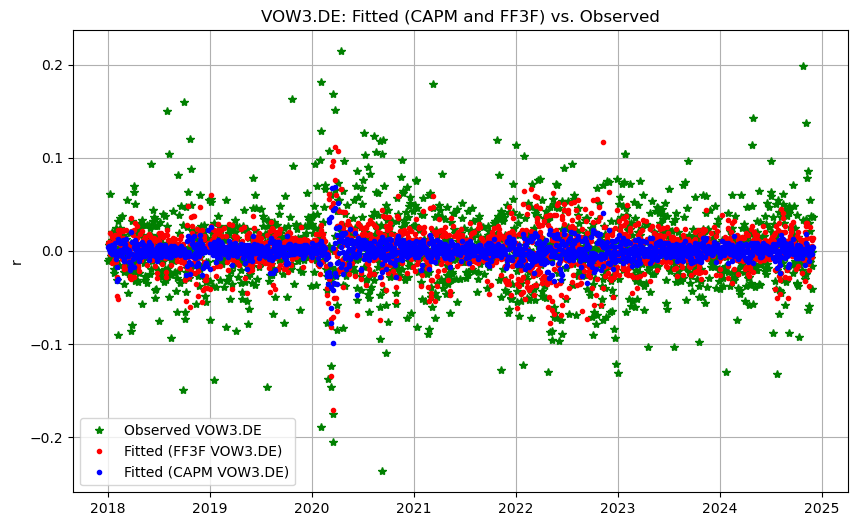

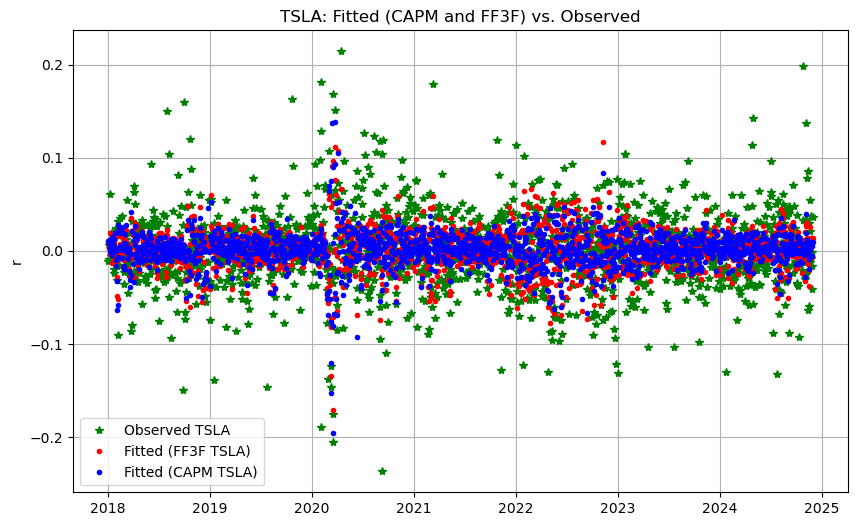

In [85]:
# Extract the fitted values from the ff3f model estimation
fitted_ff3m_vow3de = ff3fit_vow3de.fittedvalues
fitted_ff3m_tsla = ff3fit_tsla.fittedvalues

# Merge the observed with the two fitted
obs_fits_vow3de = y.to_frame().merge(fitted_ff3m_vow3de.to_frame(), left_index=True, right_index=True)
obs_fits_vow3de = obs_fits_vow3de.merge(fitted_vow3de.to_frame(), left_index=True, right_index=True)
# Rename columns for VOW3.DE
obs_fits_vow3de.columns = ['OBS_VOW3.DE', 'FF3F_VOW3.DE', 'CAPM_VOW3.DE']

# Merge the observed with the two fitted
obs_fits_tsla = y.to_frame().merge(fitted_ff3m_tsla.to_frame(), left_index=True, right_index=True)
obs_fits_tsla = obs_fits_tsla.merge(fitted_tsla.to_frame(), left_index=True, right_index=True)
# Rename columns for TSLA
obs_fits_tsla.columns = ['OBS_TSLA', 'FF3F_TSLA', 'CAPM_TSLA']


# Plot Fitted vs. Observed for VOW3.DE
plt.figure(figsize=(10, 6))
plt.plot(obs_fits_vow3de.index, obs_fits_vow3de['OBS_VOW3.DE'], 'g*', label='Observed VOW3.DE')  
plt.plot(obs_fits_vow3de.index, obs_fits_vow3de['FF3F_VOW3.DE'], 'r.', label='Fitted (FF3F VOW3.DE)')  
plt.plot(obs_fits_vow3de.index, obs_fits_vow3de['CAPM_VOW3.DE'], 'b.', label='Fitted (CAPM VOW3.DE)')  
plt.ylabel('r')
plt.title('VOW3.DE: Fitted (CAPM and FF3F) vs. Observed')
plt.legend()
plt.grid(True)
plt.show()

# Plot Fitted vs. Observed for TSLA
plt.figure(figsize=(10, 6))
plt.plot(obs_fits_tsla.index, obs_fits_tsla['OBS_TSLA'], 'g*', label='Observed TSLA')  
plt.plot(obs_fits_tsla.index, obs_fits_tsla['FF3F_TSLA'], 'r.', label='Fitted (FF3F TSLA)')  
plt.plot(obs_fits_tsla.index, obs_fits_tsla['CAPM_TSLA'], 'b.', label='Fitted (CAPM TSLA)')  
plt.ylabel('r')
plt.title('TSLA: Fitted (CAPM and FF3F) vs. Observed')
plt.legend()
plt.grid(True)
plt.show()


### 6.2.3 Estimating vs. Predicting

While estimation provides insights into past data and model parameters, prediction is crucial for anticipating future trends and making informed decisions.
Observed data is essential for testing whether the model's predictions align with reality. In other words, without observations, we cannot determine if the model is effective. Therefore, we employ a stratagem: **we pretend to be in the past.**
Suppose we are at time $T$ today, but we pretend to be at time $\tau<T$. This approach allows us to use data from the first observation day, $t$, up to $\tau$ to estimate the model's parameters, and from $\tau+1$ to $T$ to assess the accuracy or efficiency of the model's predictions!
  
This approach is a technique of **backtesting**. We assess the performance of a trading or investment strategy using historical data by simulating the strategy's execution over a historical period to evaluate its profitability, risk, and consistency. Backtesting helps us in understanding how a strategy would have performed in the past and provides insights into its potential effectiveness in real-world scenarios. 
It is based on a **strong assumption**: the historical market patterns and behaviors will repeat in the future!
By splitting our sample, we will define two subsamples of data:

1. **In-Sample Data**: refers to the portion of the dataset that is used to **train** or estimate a statistical model. The model **learns** from this information to capture patterns, relationships, and trends.

2. **Out-of-Sample Data**: represents (fake) **unseen** or future data that was not used during the model training phase. It serves as an independent dataset for evaluating the model's performance and assessing its ability to **generalize** well to **new observations**.

In summary, in-sample data is used for model training or estimation, out-of-sample data is used for model validation, and backtesting is employed to evaluate the performance of trading or investment strategies using historical data. These concepts are fundamental in ensuring that statistical models and trading strategies are robust, reliable, and capable of delivering consistent results in real-world applications.

In [88]:
# Split the sample into training and test sets for VOW3.DE
training_vow3de = merged_df_vow3de.loc[merged_df_vow3de.index < '2022-06-01']
test_vow3de = merged_df_vow3de.loc[merged_df_vow3de.index >= '2022-06-01']

print("VOW3.DE Proportion of training set:", round(training_vow3de.size / merged_df_vow3de.size, 2))

# Split the sample into training and test sets for TSLA
training_tsla = merged_df_tsla.loc[merged_df_tsla.index < '2022-06-01']
test_tsla = merged_df_tsla.loc[merged_df_tsla.index >= '2022-06-01']

print("TSLA Proportion of training set:", round(training_tsla.size / merged_df_tsla.size, 2))


VOW3.DE Proportion of training set: 0.64
TSLA Proportion of training set: 0.64


In [90]:
# estimate the CAPM beta on the training set for VOW3.DE
# extract y and X
y = training_vow3de['e_i_vow3de']
X = training_vow3de[['Mkt-RF']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
CAPMtrain_mod_vow3de = sm.OLS(y, X)
CAPMtrain_fit_vow3de = CAPMtrain_mod_vow3de.fit()

# print the summary
print(CAPMtrain_fit_vow3de.summary())


# estimate the CAPM beta on the training set for TSLA 
# extract y and X
y = training_tsla['e_i_tsla']
X = training_tsla[['Mkt-RF']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
CAPMtrain_mod_tsla = sm.OLS(y, X)
CAPMtrain_fit_tsla = CAPMtrain_mod_tsla.fit()

# print the summary
print(CAPMtrain_fit_tsla.summary())

                            OLS Regression Results                            
Dep. Variable:             e_i_vow3de   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     334.5
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           2.42e-65
Time:                        16:29:00   Log-Likelihood:                 2674.6
No. Observations:                1088   AIC:                            -5345.
Df Residuals:                    1086   BIC:                            -5335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.543      0.5

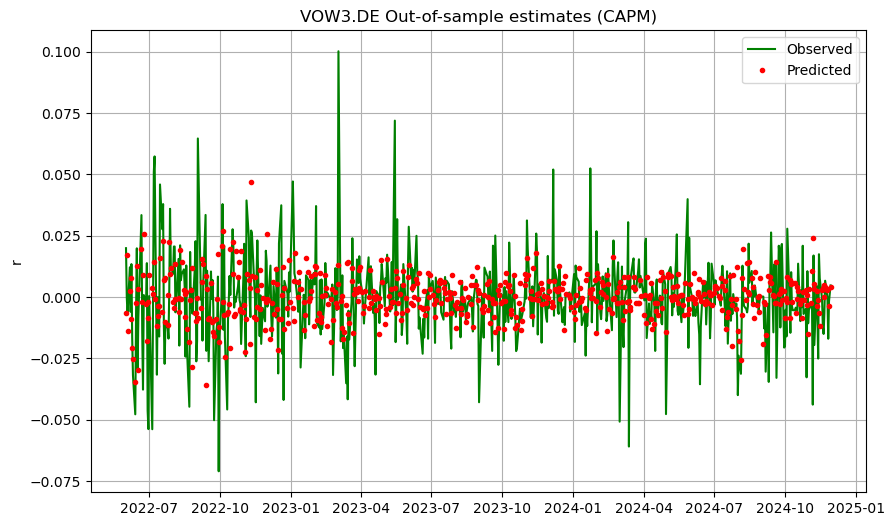

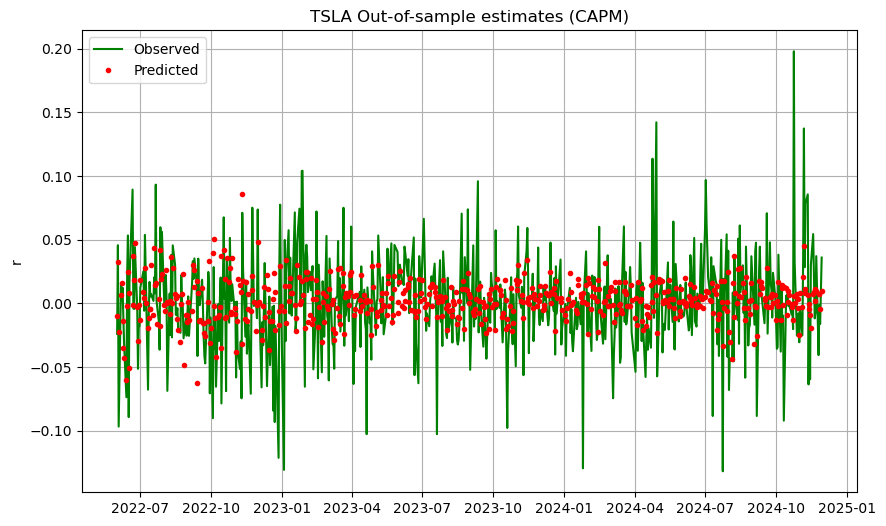

In [92]:
# Extract y and X for the test set
X_test_vow3de = test_vow3de[['Mkt-RF']]
# Add the constant to X_test
X_test_vow3de = sm.add_constant(X_test_vow3de)

# Extract y and X for the test set
X_test_tsla = test_tsla[['Mkt-RF']]
# Add the constant to X_test
X_test_tsla= sm.add_constant(X_test_tsla)


# Use the estimated parameters to make predictions for VOW3.DE
CAPM_pred_vow3de = CAPMtrain_fit_vow3de.predict(X_test_vow3de)

# Plot the predictions vs. the actuals
plt.figure(figsize=(10, 6))
plt.plot(test_vow3de.index, test_vow3de['e_i_vow3de'], 'g-', label='Observed')  
plt.plot(test_vow3de.index, CAPM_pred_vow3de, 'r.', label='Predicted')  
plt.ylabel('r')
plt.title('VOW3.DE Out-of-sample estimates (CAPM)')
plt.legend()
plt.grid(True)
plt.show()

# Use the estimated parameters to make predictions for TSLA
CAPM_pred_tsla = CAPMtrain_fit_tsla.predict(X_test_tsla)

# Plot the predictions vs. the actuals
plt.figure(figsize=(10, 6))
plt.plot(test_tsla.index, test_tsla['e_i_tsla'], 'g-', label='Observed')  
plt.plot(test_tsla.index, CAPM_pred_tsla, 'r.', label='Predicted')  
plt.ylabel('r')
plt.title('TSLA Out-of-sample estimates (CAPM)')
plt.legend()
plt.grid(True)
plt.show()

### 6.2.4 Evaluating Forecasting Accuracy 

Three of the most popular forecasting methods. Given $n$ the lenght of the test period (i.e., $n=T-\tau$), we define:  

1. Mean Absolute Error (MAE)

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

2. Mean Squared Error (MSE):

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

3. Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{MSE}$$

Now, we rapidly check who provides the best forecasts between the CAPM and the FF3FM according to these three quantities.

In [94]:
# estimate the FF3FM betas on the training set for VOW3.DE
# extract y and X
y = training_vow3de['e_i_vow3de']
X = training_vow3de[['Mkt-RF','SMB', 'HML']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
FF3FMtrain_mod_vow3de = sm.OLS(y, X)
FF3FMtrain_fit_vow3de = FF3FMtrain_mod_vow3de.fit()

# print the summary
print(FF3FMtrain_fit_vow3de.summary())


# estimate the FF3FM betas on the training set for TSLA
# extract y and X
y = training_tsla['e_i_tsla']
X = training_tsla[['Mkt-RF','SMB', 'HML']]

# add the constant to X
X = sm.add_constant(X)

# estimate and fit the model
FF3FMtrain_mod_tsla = sm.OLS(y, X)
FF3FMtrain_fit_tsla = FF3FMtrain_mod_tsla.fit()

# print the summary
print(FF3FMtrain_fit_tsla.summary())

                            OLS Regression Results                            
Dep. Variable:             e_i_vow3de   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     157.5
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           9.84e-85
Time:                        16:29:01   Log-Likelihood:                 2725.3
No. Observations:                1088   AIC:                            -5443.
Df Residuals:                    1084   BIC:                            -5423.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.558      0.5

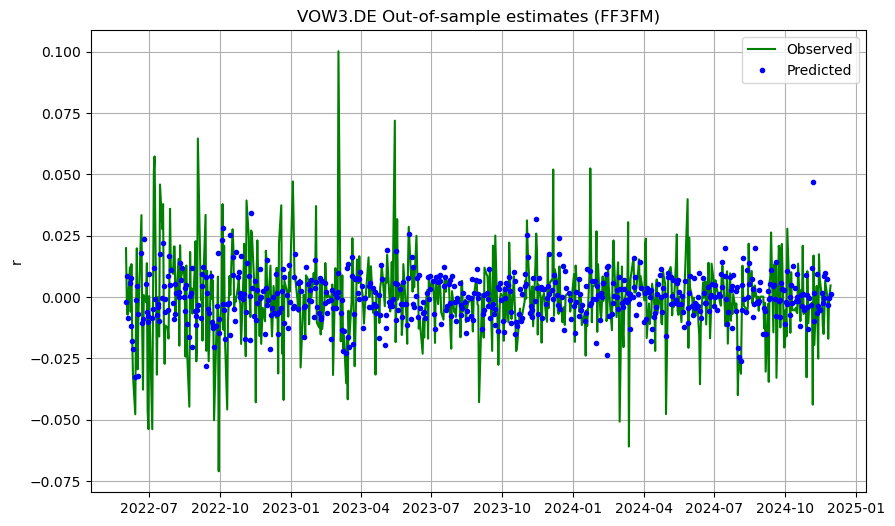

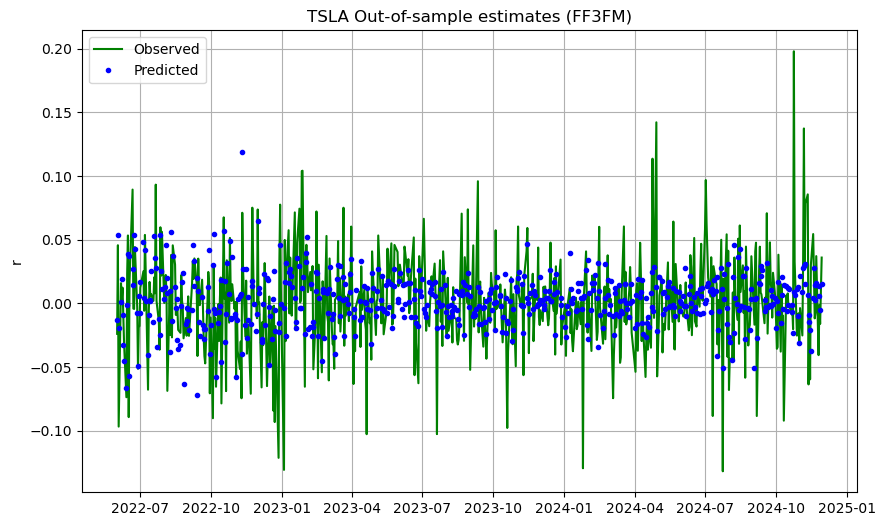

In [97]:
# Take the forecasts of the FF3FM 

# Extract y and X for the test set
X_test_vow3de = test_vow3de[['Mkt-RF','SMB', 'HML']]
# Add the constant to X_test
X_test_vow3de = sm.add_constant(X_test_vow3de)

# Extract y and X for the test set
X_test_tsla = test_tsla[['Mkt-RF','SMB', 'HML']]
# Add the constant to X_test
X_test_tsla = sm.add_constant(X_test_tsla)

# Use the estimated parameters to make predictions for VOW3.DE
FF3FM_pred_vow3de = FF3FMtrain_fit_vow3de.predict(X_test_vow3de)

# Plot the predictions vs. the actuals
plt.figure(figsize=(10, 6))
plt.plot(test_vow3de.index, test_vow3de['e_i_vow3de'], 'g-', label='Observed')  
plt.plot(test_vow3de.index, FF3FM_pred_vow3de, 'b.', label='Predicted')  
plt.ylabel('r')
plt.title('VOW3.DE Out-of-sample estimates (FF3FM)')
plt.legend()
plt.grid(True)
plt.show()

# Use the estimated parameters to make predictions for TSLA
FF3FM_pred_tsla = FF3FMtrain_fit_tsla.predict(X_test_tsla)

# Plot the predictions vs. the actuals
plt.figure(figsize=(10, 6))
plt.plot(test_tsla.index, test_tsla['e_i_tsla'], 'g-', label='Observed')  
plt.plot(test_tsla.index, FF3FM_pred_tsla, 'b.', label='Predicted')  
plt.ylabel('r')
plt.title('TSLA Out-of-sample estimates (FF3FM)')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# Compare the performance of the two models in terms of prediction accuracy

# let me define three functions: 
def MAPE(y_true, y_pred):
    # convert the input in numpy to avoid type issues
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    MAPE = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return round(MAPE,6)

def MSE(y_true, y_pred):
    # convert the input in numpy to avoid type issues
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    MSE = np.mean((y_true - y_pred) ** 2)
    return round(MSE,6)

def RMSE(y_true, y_pred):
    # convert the input in numpy to avoid type issues
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    RMSE = np.sqrt(MSE(y_true, y_pred))
    return round(RMSE,6)

# now compute these values for the two predictions for VOW3.DE:  
MAPE_CAPM_vow3de, MSE_CAPM_vow3de, RMSE_CAPM_vow3de = [MAPE(test_vow3de['e_i_vow3de'],CAPM_pred_vow3de), MSE(test_vow3de['e_i_vow3de'],CAPM_pred_vow3de),RMSE(test_vow3de['e_i_vow3de'],CAPM_pred_vow3de)]
MAPE_FF3FM_vow3de, MSE_FF3FM_vow3de, RMSE_FF3FM_vow3de = [MAPE(test_vow3de['e_i_vow3de'],FF3FM_pred_vow3de),MSE(test_vow3de['e_i_vow3de'],FF3FM_pred_vow3de),RMSE(test_vow3de['e_i_vow3de'],FF3FM_pred_vow3de)]


# now compute these values for the two predictions for TSLA:  
MAPE_CAPM_tsla, MSE_CAPM_tsla, RMSE_CAPM_tsla = [MAPE(test_tsla['e_i_tsla'],CAPM_pred_tsla), MSE(test_tsla['e_i_tsla'],CAPM_pred_tsla),RMSE(test_tsla['e_i_tsla'],CAPM_pred_tsla)]
MAPE_FF3FM_tsla, MSE_FF3FM_tsla, RMSE_FF3FM_tsla = [MAPE(test_tsla['e_i_tsla'],FF3FM_pred_tsla),MSE(test_tsla['e_i_tsla'],FF3FM_pred_tsla),RMSE(test_tsla['e_i_tsla'],FF3FM_pred_tsla)]

# improve the output for both VOW3.DE and TSLA
data_vow3de = {
    'CAPM (VOW3.DE)': [MAPE_CAPM_vow3de, MSE_CAPM_vow3de, RMSE_CAPM_vow3de],
    'FF3FM (VOW3.DE)': [MAPE_FF3FM_vow3de, MSE_FF3FM_vow3de, RMSE_FF3FM_vow3de]
}
data_tsla = {
    'CAPM (TSLA)': [MAPE_CAPM_tsla, MSE_CAPM_tsla, RMSE_CAPM_tsla],
    'FF3FM (TSLA)': [MAPE_FF3FM_tsla, MSE_FF3FM_tsla, RMSE_FF3FM_tsla]
}

# convert the dictionaries into dataframes
Measures_vow3de = pd.DataFrame(data_vow3de, index=['MAPE', 'MSE', 'RMSE'])
Measures_tsla = pd.DataFrame(data_tsla, index=['MAPE', 'MSE', 'RMSE'])

print(Measures_vow3de)
print()
print(Measures_tsla)

      CAPM (VOW3.DE)  FF3FM (VOW3.DE)
MAPE      451.659089       468.447081
MSE         0.000267         0.000260
RMSE        0.016340         0.016125

      CAPM (TSLA)  FF3FM (TSLA)
MAPE   162.646099    193.434390
MSE      0.001023      0.000994
RMSE     0.031984      0.031528


## 6.3 Risk Measures

Assets are evaluated according to their profitability (i.e., returns) and their risk. The popular measures that can be used are: 

For a given period $M$ of size m, considering an asset $i$ we have: 

1. **Volatility**: 
    $$\sigma_i = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(r_i - \bar{r})^2},$$
    where: 
        . $r_i$ is the return vector of returns of the asset $i$
        . $\bar{r}$ is the average return computed over the period $M$.
    A higher volatility is interpreted as a higher risk of loss.
     
2. **Beta**: 
    $$\beta_i = \frac{Cov(r_i, r_{mkt})}{Var(r_{mkt})},$$
    with $r_{mkt}$ the excess of returns of the market.
    
    As we saw, beta is a measure of an asset's sensitivity to market movements. See the beta interpretation above.
    
3. **Value at Risk** (**VaR**)

    $$VaR_\alpha = F^{-1}_{r_i}(\alpha),$$
    where $F^{-1}_{r_i}(\alpha)$ represents the inverse cumulative distribution function (CDF) of the return distribution, evaluated at the confidence level $\alpha \in (0,1)$.

    The VaR is defined as a measure of the maximum potential loss an asset could experience within a specified time frame, at a certain level of confidence $1-\alpha$ (e.g., 99.5\%). 

4. **Expected Shortfall (ES)** or **Conditional Value at Risk** (**CVaR**):

$$\text{ES}_\alpha = \frac{1}{1-\alpha}\int_{-\infty}^{\text{VaR}_\alpha}r_if(r_i)dr_i $$
It measures the average loss beyond the VaR. It provides a more comprehensive risk assessment than VaR.

In [102]:
# 1. volatility
def volatility(returns):
    return np.sqrt(np.mean((returns - np.mean(returns)) ** 2))

# 2. CAPM beta
def beta(asset_returns, market_returns):
    covariance = np.cov(asset_returns, market_returns)[0, 1] # take the element in pos 0,1
    market_variance = np.var(market_returns)
    return covariance / market_variance

# 3. VaR
def VaR(returns, alpha):
    return -np.percentile(returns, alpha)

# 4. ES
def ES(returns, alpha):
    var_alpha = VaR(returns, alpha)
    return np.mean(returns[returns < -var_alpha])


In [104]:
# compute these risk measures for our returns for VOW3.DE 
alpha = 0.005
e_vow3de = merged_df_vow3de['e_i_vow3de']
mkt_vow3de = merged_df_vow3de['Mkt-RF']

vol_VOW3DE = volatility(e_vow3de)
beta_VOW3DE = beta(e_vow3de,mkt_vow3de)
VaR_VOW3DE_05 = VaR(e_vow3de,alpha)
ES_VOW3DE_05 = ES(e_vow3de,alpha)

# compute these risk measures for our returns for TSLA 
alpha = 0.005
e_tsla = merged_df_tsla['e_i_tsla']
mkt_tsla = merged_df_tsla['Mkt-RF']

vol_TSLA = volatility(e_tsla)
beta_TSLA = beta(e_tsla,mkt_tsla)
VaR_TSLA_05 = VaR(e_tsla,alpha)
ES_TSLA_05 = ES(e_tsla,alpha)

# combine VOW3.DE and TSLA performance measures into a single DataFrame
combined_data_risk = {
    'Metric': ['Volatility', 'Beta', 'VaR (0.5%)', 'ES (0.5%)'],
    'VOW3.DE': [vol_VOW3DE, beta_VOW3DE, VaR_VOW3DE_05, ES_VOW3DE_05],
    'TSLA': [vol_TSLA, beta_TSLA, VaR_TSLA_05, ES_TSLA_05]
}

# convert the combined data into a formatted DataFrame
combined_risk_measures = pd.DataFrame(combined_data_risk).set_index('Metric')
combined_risk_measures


,VOW3.DE,TSLA
Metric,,
Volatility,0.021525,0.040158
Beta,0.762536,1.589625
VaR (0.5%),0.162051,0.233871
ES (0.5%),-0.165070,-0.236518


## 6.4 Performance Measures

Assets are evaluated using a combination of returns and profitability. This is often referred as risk-weighted performance. 
List of the most popular performance metrics. 
For a given asset $i$ observed over a period $M$ of size $m$, we define: 

1. **Sharpe Ratio (SR)**:

    $$SR = \frac{r_i - r_f}{\sigma_i},$$
    where r_f is the risk-free rate.
    
    It compares an asset's average return to its risk, measured by volatility. A higher value indicates a better risk-return tradeoff.
2. **Sortino Ratio (SoR)**:
    $$\frac{r_i - r_f}{\sigma^{d}_i},$$
    where $\sigma^{d}_i$ is the downside risk defined as: 
    
    $$\sigma^{d}_i = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\min(0, r_i - \bar{r}))^2},$$
    namely the standard deviation of the negative returns of the asset $i$, representing the risk associated with potential losses.
    
    Similar to the SR, but it uses only the std deviation of negative returns to measure risk. This makes it more suitable for assessing downside risk.
    
3. **Max Drawdown** (**MDD**):

    $$MDD_M = \frac{P_M-L_M}{P_M},$$
    where: 
    . $P_M$ is the peak value before the largest drop occurred during M and
    . $L_M$ is the lowest value before new high established.

    It represents the maximum loss experienced by an asset relative to its historical peak, measured as the percentage decline from the peak to the lowest point. In other words, it is the maximum percentage decline from a previously achieved high.
    
4. **Calmar Ratio** (**CR**)
    $$CR = \frac{r_i - r_f}{MDD},$$
Similar to the other ratios, but it uses max drawdown in the denominator as opposed to standard deviation. 
Define the function we will use to compute this measures and compute them for the returns of VOW3.DE and TSLA. 


In [107]:
def SharpeRatio(ret,rf=0):
    mu = np.mean(ret-rf)*252
    std = ret.std()*np.sqrt(252)
    return mu, std, mu/std*100

def SortinoRatio(ret,rf=0):
    mu = np.mean(ret-rf)*252
    std_neg = ret[ret<0].std()*np.sqrt(252)
    return mu, std_neg, mu/std_neg*100

def MDD(ret,rf=0):
    comp_ret = (ret-rf+1).cumprod()
    peak = ret.expanding(min_periods=1).max() # increase the window size
    dd = (comp_ret/peak)-1
    return dd.min()

def CalmarRatio(ret,rf=0):
    mu = np.mean(ret-rf)*252
    mdd = MDD(ret,rf)
    calmar = mu/(mdd*252)
    return mu, calmar*100

In [109]:
# apply these performance measures to our data for VOW3.DE
e_vow3de = merged_df_vow3de['e_i_vow3de']
mkt_vow3de = merged_df_vow3de['Mkt-RF']
rf = merged_df_vow3de['RF']

SR_VOW3DE = SharpeRatio(e_vow3de,rf =0) # e is already r-rf
SO_VOW3DE = SortinoRatio(e_vow3de,rf =0)
MDD_VOW3DE = MDD(e_vow3de)
CR_VOW3DE = CalmarRatio(e_vow3de,rf =0)

# apply these performance measures to our data for TSLA 
e_tsla = merged_df_tsla['e_i_tsla']
mkt_tsla = merged_df_tsla['Mkt-RF']
rf = merged_df_tsla['RF']

SR_TSLA = SharpeRatio(e_tsla,rf =0) # e is already r-rf
SO_TSLA = SortinoRatio(e_tsla,rf =0)
MDD_TSLA = MDD(e_tsla)
CR_TSLA = CalmarRatio(e_tsla,rf =0)

# combine VOW3.DE and TSLA performance measures into a single DataFrame
combined_data_performance = {
    'Metric': ['SR', 'SoR', 'MDD', 'CR'],
    'VOW3DE': [SR_VOW3DE[2], SO_VOW3DE[2], MDD_VOW3DE, CR_VOW3DE[1]],
    'TSLA': [SR_TSLA[2], SO_TSLA[2], MDD_TSLA, CR_TSLA[1]]
}

# convert the combined data into a formatted DataFrame
combined_performance_measures = pd.DataFrame(combined_data_performance).set_index('Metric')
combined_performance_measures


,VOW3DE,TSLA
Metric,,
SR,-14.003591,60.740331
SoR,-19.455830,86.128110
MDD,1.772356,-118.043689
CR,-0.010717,-0.001302
